In [8]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

# print("Path to dataset files:", path)

In [9]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

df = pd.read_csv("./Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


___
## Renomeando as colunas
___

In [10]:
nomes_colunas = {'Country': 'pais', 'Year': 'ano', 'Status': 'status', 'Life expectancy ': 'expectativa_vida', 'Adult Mortality': 'mortalidade_adulta', 'infant deaths': 'mortes_infanis', 
                 'Alcohol': 'consumo_alcool', 'percentage expenditure': 'pct_despesa_saude_pib', 'Hepatitis B': 'vacina_hep_b_crianca', 'Measles ': 'relato_sarampo', ' BMI ': 'IMC', 
                 'under-five deaths ': 'mortalidade_5anos', 'Polio': 'vacina_poliomelite_crianca', 'Total expenditure': 'pct_despesa_saude', 'Diphtheria ': 'vacina_difteria_crianca', 
                 ' HIV/AIDS': 'morte_HIV_4anos', 'GDP': 'PIB', 'Population': 'populacao', ' thinness  1-19 years': 'magreza_10_19', ' thinness 5-9 years': 'magreza_5_9', 
                 'Income composition of resources': 'composicao_recursos_renda', 'Schooling': 'escolaridade'}

In [11]:
mydf = df.rename(columns=nomes_colunas)
mydf.columns

Index(['pais', 'ano', 'status', 'expectativa_vida', 'mortalidade_adulta',
       'mortes_infanis', 'consumo_alcool', 'pct_despesa_saude_pib',
       'vacina_hep_b_crianca', 'relato_sarampo', 'IMC', 'mortalidade_5anos',
       'vacina_poliomelite_crianca', 'pct_despesa_saude',
       'vacina_difteria_crianca', 'morte_HIV_4anos', 'PIB', 'populacao',
       'magreza_10_19', 'magreza_5_9', 'composicao_recursos_renda',
       'escolaridade'],
      dtype='object')

___
## Calculando a pct de nulos
___

In [12]:
print('Porcentagem de nulos para cada variável:','\n',(mydf.isnull().sum()/mydf.shape[0])*100)

Porcentagem de nulos para cada variável: 
 pais                           0.000000
ano                            0.000000
status                         0.000000
expectativa_vida               0.340368
mortalidade_adulta             0.340368
mortes_infanis                 0.000000
consumo_alcool                 6.603131
pct_despesa_saude_pib          0.000000
vacina_hep_b_crianca          18.822328
relato_sarampo                 0.000000
IMC                            1.157250
mortalidade_5anos              0.000000
vacina_poliomelite_crianca     0.646698
pct_despesa_saude              7.692308
vacina_difteria_crianca        0.646698
morte_HIV_4anos                0.000000
PIB                           15.248468
populacao                     22.191967
magreza_10_19                  1.157250
magreza_5_9                    1.157250
composicao_recursos_renda      5.684139
escolaridade                   5.547992
dtype: float64


___
## Verificando os países em cada ano
___

In [13]:
## Quantidade de paises em cada ano
for i in mydf.ano.unique():
    print('Número de países em', i, ':', len(mydf[mydf['ano'] == i].pais.unique()))

## Fazer um looping do ano de 2013 com os outros anos para saber quais países estão faltando
for i in mydf.ano.unique():
    diff_2013 = mydf[mydf['ano'] == 2013][~mydf[mydf['ano'] == 2013]['pais'].isin(mydf[mydf['ano'] == i]['pais'])]
    print('Países faltando em', i, ':', diff_2013.pais.unique())


Número de países em 2015 : 183
Número de países em 2014 : 183
Número de países em 2013 : 193
Número de países em 2012 : 183
Número de países em 2011 : 183
Número de países em 2010 : 183
Número de países em 2009 : 183
Número de países em 2008 : 183
Número de países em 2007 : 183
Número de países em 2006 : 183
Número de países em 2005 : 183
Número de países em 2004 : 183
Número de países em 2003 : 183
Número de países em 2002 : 183
Número de países em 2001 : 183
Número de países em 2000 : 183
Países faltando em 2015 : ['Cook Islands' 'Dominica' 'Marshall Islands' 'Monaco' 'Nauru' 'Niue'
 'Palau' 'Saint Kitts and Nevis' 'San Marino' 'Tuvalu']
Países faltando em 2014 : ['Cook Islands' 'Dominica' 'Marshall Islands' 'Monaco' 'Nauru' 'Niue'
 'Palau' 'Saint Kitts and Nevis' 'San Marino' 'Tuvalu']
Países faltando em 2013 : []
Países faltando em 2012 : ['Cook Islands' 'Dominica' 'Marshall Islands' 'Monaco' 'Nauru' 'Niue'
 'Palau' 'Saint Kitts and Nevis' 'San Marino' 'Tuvalu']
Países faltando em 

In [14]:
## Fazer um looping para todos os anos
anos = mydf.ano.unique()
for i in mydf.ano.unique():
    for j in anos:
        if i != j:
            all_diff = mydf[mydf['ano'] == i][~mydf[mydf['ano'] == i]['pais'].isin(mydf[mydf['ano'] == j]['pais'])]
            print('Países faltando em', j, 'em relação a', i, ':', all_diff.pais.unique())

Países faltando em 2014 em relação a 2015 : []
Países faltando em 2013 em relação a 2015 : []
Países faltando em 2012 em relação a 2015 : []
Países faltando em 2011 em relação a 2015 : []
Países faltando em 2010 em relação a 2015 : []
Países faltando em 2009 em relação a 2015 : []
Países faltando em 2008 em relação a 2015 : []
Países faltando em 2007 em relação a 2015 : []
Países faltando em 2006 em relação a 2015 : []
Países faltando em 2005 em relação a 2015 : []
Países faltando em 2004 em relação a 2015 : []
Países faltando em 2003 em relação a 2015 : []
Países faltando em 2002 em relação a 2015 : []
Países faltando em 2001 em relação a 2015 : []
Países faltando em 2000 em relação a 2015 : []
Países faltando em 2015 em relação a 2014 : []
Países faltando em 2013 em relação a 2014 : []
Países faltando em 2012 em relação a 2014 : []
Países faltando em 2011 em relação a 2014 : []
Países faltando em 2010 em relação a 2014 : []
Países faltando em 2009 em relação a 2014 : []
Países faltan

In [15]:
## Analisando as osbservações nulas para os 10 países que 'sobraram' em 2013
(mydf[(mydf['ano'] == 2013) & (mydf['pais'].isin(diff_2013.pais.unique()))].isnull().sum()/mydf[(mydf['ano'] == 2013) & (mydf['pais'].isin(diff_2013.pais.unique()))].shape[0])*100

pais                            0.0
ano                             0.0
status                          0.0
expectativa_vida              100.0
mortalidade_adulta            100.0
mortes_infanis                  0.0
consumo_alcool                 10.0
pct_despesa_saude_pib           0.0
vacina_hep_b_crianca            0.0
relato_sarampo                  0.0
IMC                            20.0
mortalidade_5anos               0.0
vacina_poliomelite_crianca      0.0
pct_despesa_saude               0.0
vacina_difteria_crianca         0.0
morte_HIV_4anos                 0.0
PIB                            50.0
populacao                      80.0
magreza_10_19                  20.0
magreza_5_9                    20.0
composicao_recursos_renda      70.0
escolaridade                   30.0
dtype: float64

In [16]:
## Como a quantidade de nulos é muito alta para o nosso target para esses únicos 10 países em 2013, vamos retirar esses países do dataset
df_filtrado = mydf[~mydf['pais'].isin(diff_2013.pais.unique())]

## Verificando a porcentagem de nulos após a retirada dos 10 países
(df_filtrado.isna().sum()/df_filtrado.shape[0])*100

pais                           0.000000
ano                            0.000000
status                         0.000000
expectativa_vida               0.000000
mortalidade_adulta             0.000000
mortes_infanis                 0.000000
consumo_alcool                 6.591530
pct_despesa_saude_pib          0.000000
vacina_hep_b_crianca          18.886612
relato_sarampo                 0.000000
IMC                            1.092896
mortalidade_5anos              0.000000
vacina_poliomelite_crianca     0.648907
pct_despesa_saude              7.718579
vacina_difteria_crianca        0.648907
morte_HIV_4anos                0.000000
PIB                           15.129781
populacao                     21.994536
magreza_10_19                  1.092896
magreza_5_9                    1.092896
composicao_recursos_renda      5.464481
escolaridade                   5.464481
dtype: float64

___
## Plotando o comportamento do nosso target
___

In [17]:
df_filtrado[df_filtrado['status'] == 'Developing']

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,vacina_hep_b_crianca,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,PIB,populacao,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


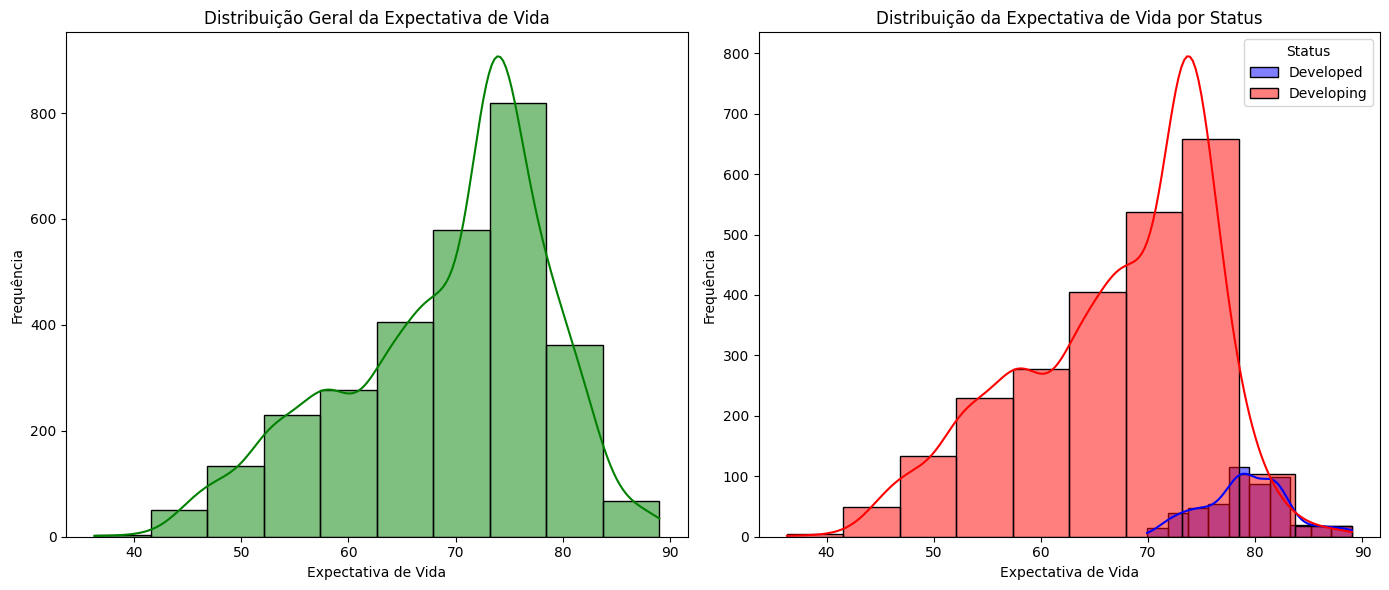

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a figura e os subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Distribuição geral da expectativa de vida
sns.histplot(df_filtrado['expectativa_vida'], kde=True, bins=10, color='green', ax=axes[0])
axes[0].set_title('Distribuição Geral da Expectativa de Vida')
axes[0].set_xlabel('Expectativa de Vida')
axes[0].set_ylabel('Frequência')

# Gráfico 2: Distribuição da expectativa de vida por status (Developed vs Developing)
sns.histplot(df_filtrado[df_filtrado['status'] == 'Developed']['expectativa_vida'], 
             kde=True, bins=10, color='blue', label='Developed', ax=axes[1])
sns.histplot(df_filtrado[df_filtrado['status'] == 'Developing']['expectativa_vida'], 
             kde=True, bins=10, color='red', label='Developing', ax=axes[1])

# Configurações do segundo gráfico
axes[1].set_title('Distribuição da Expectativa de Vida por Status')
axes[1].set_xlabel('Expectativa de Vida')
axes[1].set_ylabel('Frequência')
axes[1].legend(title='Status')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [19]:
print(f'Variância do nosso target: {df_filtrado[df_filtrado['status'] == 'Developing']['expectativa_vida'].var()} \nMédia do nosso target: {df_filtrado[df_filtrado['status'] == 'Developing']['expectativa_vida'].mean()} \nDesvio Padrão do nosso target: {df_filtrado[df_filtrado['status'] == 'Developing']['expectativa_vida'].std()}')

print(f'\n Variância do nosso target: {df_filtrado[df_filtrado['status'] == 'Developed']['expectativa_vida'].var()} \nMédia do nosso target: {df_filtrado[df_filtrado['status'] == 'Developed']['expectativa_vida'].mean()} \nDesvio Padrão do nosso target: {df_filtrado[df_filtrado['status'] == 'Developed']['expectativa_vida'].std()}')


Variância do nosso target: 81.10969458098529 
Média do nosso target: 67.11146523178807 
Desvio Padrão do nosso target: 9.00609208152933

 Variância do nosso target: 15.452304572835125 
Média do nosso target: 79.1978515625 
Desvio Padrão do nosso target: 3.9309419447296756


___
## Plotando o comportamento dos missings em relação ao target
___

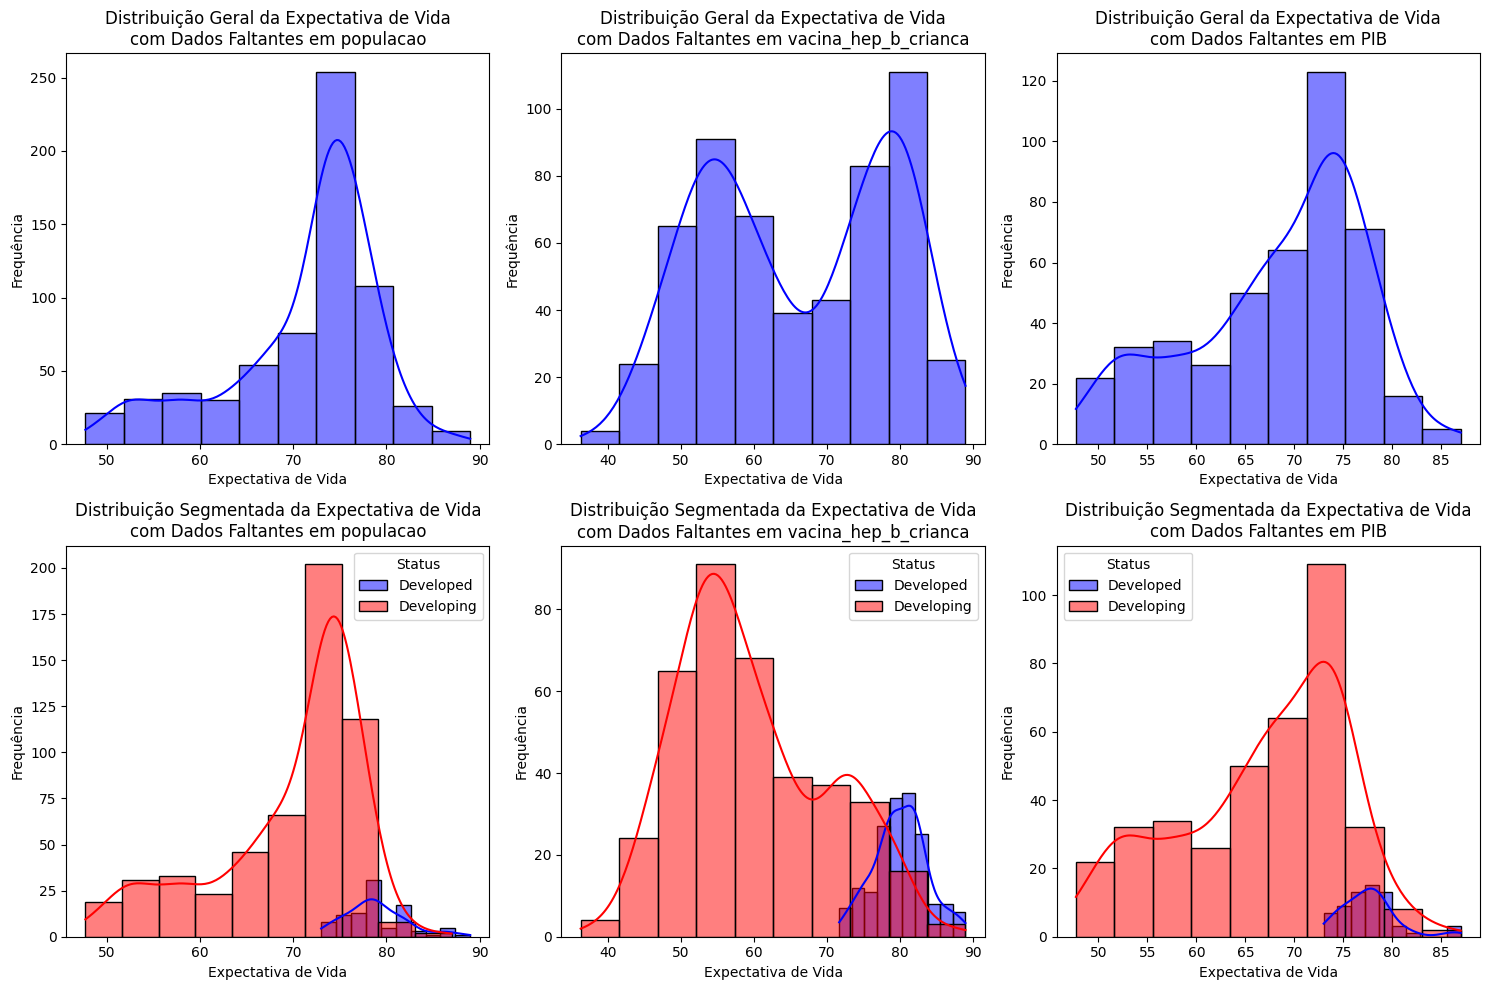

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

altos_missings = ['populacao', 'vacina_hep_b_crianca', 'PIB']

num_graficos = len(altos_missings)
fig, axes = plt.subplots(2, num_graficos, figsize=(15, 10))  # Duas linhas, uma para o gráfico geral e outra para o segmentado

# Loop para criar os gráficos
for idx, i in enumerate(altos_missings):
    df_aux = df_filtrado[df_filtrado[i].isna()]  # Filtra os dados com valores faltantes na coluna i

    # Gráfico 1: Distribuição geral da expectativa de vida (primeira linha de gráficos)
    sns.histplot(data=df_aux, x='expectativa_vida', kde=True, bins=10, color='blue', ax=axes[0, idx])
    axes[0, idx].set_title(f'Distribuição Geral da Expectativa de Vida\ncom Dados Faltantes em {i}')
    axes[0, idx].set_xlabel('Expectativa de Vida')
    axes[0, idx].set_ylabel('Frequência')

    # Gráfico 2: Distribuição segmentada por 'Developed' e 'Developing' (segunda linha de gráficos)
    sns.histplot(data=df_aux[df_aux['status'] == 'Developed'], x='expectativa_vida', kde=True, 
                 bins=10, color='blue', label='Developed', ax=axes[1, idx])
    sns.histplot(data=df_aux[df_aux['status'] == 'Developing'], x='expectativa_vida', kde=True, 
                 bins=10, color='red', label='Developing', ax=axes[1, idx])
    
    axes[1, idx].set_title(f'Distribuição Segmentada da Expectativa de Vida\ncom Dados Faltantes em {i}')
    axes[1, idx].set_xlabel('Expectativa de Vida')
    axes[1, idx].set_ylabel('Frequência')
    axes[1, idx].legend(title='Status')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()


In [21]:
df_missings = df_filtrado[df_filtrado['populacao'].isna()][['pais', 'ano']]

# Criar um dicionário para armazenar os resultados
dicionario_pais_anos = {}

# Preencher o dicionário
for _, row in df_missings.iterrows():
    pais = row['pais']
    ano = row['ano']
    
    if pais not in dicionario_pais_anos:
        dicionario_pais_anos[pais] = []
    
    dicionario_pais_anos[pais].append(ano)

print(len(df_missings.pais.unique()))
print('Países com dados faltantes em "populacao" e os anos correspondentes:', dicionario_pais_anos)

41
Países com dados faltantes em "populacao" e os anos correspondentes: {'Antigua and Barbuda': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Bahamas': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Bahrain': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Barbados': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Bolivia (Plurinational State of)': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Brunei Darussalam': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], "Côte d'Ivoire": [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Congo': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Cu

In [22]:
df_missings = df_filtrado[df_filtrado['vacina_hep_b_crianca'].isna()][['pais', 'ano']]

# Criar um dicionário para armazenar os resultados
dicionario_pais_anos = {}

# Preencher o dicionário
for _, row in df_missings.iterrows():
    pais = row['pais']
    ano = row['ano']
    
    if pais not in dicionario_pais_anos:
        dicionario_pais_anos[pais] = []
    
    dicionario_pais_anos[pais].append(ano)

print(len(df_missings.pais.unique()))
print(df_missings.pais.unique())
print('Países com dados faltantes em "vacina_hep_b_crianca" e os anos correspondentes:', dicionario_pais_anos)

98
['Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Benin'
 'Bosnia and Herzegovina' 'Burkina Faso' 'Burundi' "Côte d'Ivoire"
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'Comoros' 'Congo' 'Croatia' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Finland' 'Gabon'
 'Ghana' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Ireland' 'Jamaica' 'Japan' 'Kenya'
 "Lao People's Democratic Republic" 'Lesotho' 'Liberia' 'Madagascar'
 'Malawi' 'Mali' 'Malta' 'Mauritania' 'Montenegro' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Netherlands' 'Niger' 'Nigeria' 'Norway' 'Pakistan'
 'Panama' 'Paraguay' 'Peru' 'Russian Federation' 'Rwanda' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Sao Tome and Principe' 'Senegal'
 'Serbia' 'Sierra Le

In [23]:
df_missings = df_filtrado[df_filtrado['PIB'].isna()][['pais', 'ano']]

# Criar um dicionário para armazenar os resultados
dicionario_pais_anos = {}

# Preencher o dicionário
for _, row in df_missings.iterrows():
    pais = row['pais']
    ano = row['ano']
    
    if pais not in dicionario_pais_anos:
        dicionario_pais_anos[pais] = []
    
    dicionario_pais_anos[pais].append(ano)

print(len(df_missings.pais.unique()))
print(df_missings.pais.unique())
print('Países com dados faltantes em "PIB" e os anos correspondentes:', dicionario_pais_anos)

33
['Bahamas' 'Bolivia (Plurinational State of)' "Côte d'Ivoire" 'Congo'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Egypt' 'Eritrea' 'Gambia'
 'Iran (Islamic Republic of)' 'Iraq' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Libya'
 'Micronesia (Federated States of)' 'Papua New Guinea' 'Republic of Korea'
 'Republic of Moldova' 'Saint Lucia' 'Saint Vincent and the Grenadines'
 'Sao Tome and Principe' 'Slovakia' 'Somalia' 'South Sudan'
 'Syrian Arab Republic' 'The former Yugoslav republic of Macedonia'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'United States of America'
 'Venezuela (Bolivarian Republic of)' 'Viet Nam' 'Yemen']
Países com dados faltantes em "PIB" e os anos correspondentes: {'Bahamas': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Bolivia (Plurinational State of)': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 20

In [24]:
df_filtrado2 = df_filtrado.drop(columns=['populacao', 'vacina_hep_b_crianca', 'PIB'])
df_filtrado2.head()

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


In [25]:
## Verificando a porcentagem de nulos após a retirada dos 10 países
(df_filtrado2.isna().sum()/df_filtrado2.shape[0])*100

pais                          0.000000
ano                           0.000000
status                        0.000000
expectativa_vida              0.000000
mortalidade_adulta            0.000000
mortes_infanis                0.000000
consumo_alcool                6.591530
pct_despesa_saude_pib         0.000000
relato_sarampo                0.000000
IMC                           1.092896
mortalidade_5anos             0.000000
vacina_poliomelite_crianca    0.648907
pct_despesa_saude             7.718579
vacina_difteria_crianca       0.648907
morte_HIV_4anos               0.000000
magreza_10_19                 1.092896
magreza_5_9                   1.092896
composicao_recursos_renda     5.464481
escolaridade                  5.464481
dtype: float64

In [26]:
paises_escolaridade_na = df_filtrado2[df_filtrado2['vacina_poliomelite_crianca'].isna()]
paises_escolaridade_na

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
1742,Montenegro,2005,Developing,73.6,133.0,0,NaN,527.307672,0,55.7,0,NaN,8.46,NaN,0.1,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,0,55.0,0,NaN,8.45,NaN,0.1,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,0,54.2,0,NaN,8.91,NaN,0.1,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,0,53.5,0,NaN,8.33,NaN,0.1,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,0,52.7,0,NaN,8.23,NaN,0.1,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,0,51.9,0,NaN,7.32,NaN,0.1,2.6,2.7,0.000,0.0
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,0,NaN,41,NaN,NaN,NaN,4.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,0,NaN,42,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,0,NaN,42,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,0,NaN,43,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0


In [27]:
df_filtrado2[(df_filtrado2['pais'] == 'South Sudan') | (df_filtrado2['pais'] == 'Sudan')]

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,878,NaN,39,41.0,NaN,31.0,3.4,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,441,NaN,39,44.0,2.74,39.0,3.5,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,525,NaN,40,5.0,2.62,45.0,3.6,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,1952,NaN,40,64.0,2.77,59.0,3.8,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,1256,NaN,41,66.0,NaN,61.0,3.9,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,0,NaN,41,NaN,NaN,NaN,4.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,0,NaN,42,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,0,NaN,42,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,0,NaN,43,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0
2418,South Sudan,2006,Developing,52.5,383.0,28,NaN,0.000000,0,NaN,43,NaN,NaN,NaN,4.1,NaN,NaN,0.000,0.0


In [28]:
## Removendo o pais sudao do Sul, pois possui muitos valores nulos ou zerados e o Sudão por IMC, e as magrezas serem nulas e eu não saber como substituir
df_filtrado3 = df_filtrado2[(df_filtrado2['pais'] != 'South Sudan') & (df_filtrado2['pais'] != 'Sudan')]
vacina_poliomelite_criancae_na = df_filtrado3[df_filtrado3['vacina_poliomelite_crianca'].isna()]
vacina_poliomelite_criancae_na

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
1742,Montenegro,2005,Developing,73.6,133.0,0,NaN,527.307672,0,55.7,0,NaN,8.46,NaN,0.1,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,0,55.0,0,NaN,8.45,NaN,0.1,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,0,54.2,0,NaN,8.91,NaN,0.1,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,0,53.5,0,NaN,8.33,NaN,0.1,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,0,52.7,0,NaN,8.23,NaN,0.1,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,0,51.9,0,NaN,7.32,NaN,0.1,2.6,2.7,0.000,0.0
2615,Timor-Leste,2001,Developing,59.4,269.0,3,0.50,6.556583,0,12.3,4,NaN,3.75,NaN,0.1,12.1,12.2,0.470,9.8
2616,Timor-Leste,2000,Developing,58.7,276.0,3,0.50,49.069672,0,11.9,4,NaN,3.26,NaN,0.1,12.2,12.2,0.000,0.0


In [29]:
# 1. Calcular a média de consumo de álcool por país, ignorando os valores ausentes
media_consumo = df_filtrado3.groupby('pais')['consumo_alcool'].mean()

# 2. Criar uma função para imputar a média nos valores ausentes
def imputar_media(row, coluna):
    if pd.isnull(row[coluna]):
        return media_consumo[row['pais']]
    else:
        return row[coluna]

# 3. Aplicar a função ao DataFrame
df_filrado4 = df_filtrado3.copy()
df_filrado4['consumo_alcool'] = df_filrado4.apply(imputar_media, axis=1, args=('consumo_alcool',))
df_filrado4['vacina_poliomelite_crianca'] = df_filrado4.apply(imputar_media, axis=1, args=('vacina_poliomelite_crianca',))
df_filrado4['vacina_difteria_crianca'] = df_filrado4.apply(imputar_media, axis=1, args=('vacina_difteria_crianca',))
df_filrado4['pct_despesa_saude'] = df_filrado4.apply(imputar_media, axis=1, args=('pct_despesa_saude',))

df_filrado4.head()

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


In [30]:
## Verificando a porcentagem de nulos após a retirada dos 10 países
(df_filrado4.isna().sum()/df_filrado4.shape[0])*100

pais                          0.000000
ano                           0.000000
status                        0.000000
expectativa_vida              0.000000
mortalidade_adulta            0.000000
mortes_infanis                0.000000
consumo_alcool                0.000000
pct_despesa_saude_pib         0.000000
relato_sarampo                0.000000
IMC                           0.000000
mortalidade_5anos             0.000000
vacina_poliomelite_crianca    0.000000
pct_despesa_saude             0.000000
vacina_difteria_crianca       0.000000
morte_HIV_4anos               0.000000
magreza_10_19                 0.000000
magreza_5_9                   0.000000
composicao_recursos_renda     5.524862
escolaridade                  5.524862
dtype: float64

In [31]:
df_cleaned = df_filrado4.dropna()
df_cleaned.head()

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


In [32]:
## Verificando a porcentagem de nulos após a retirada dos 10 países
(df_cleaned.isna().sum()/df_cleaned.shape[0])*100

pais                          0.0
ano                           0.0
status                        0.0
expectativa_vida              0.0
mortalidade_adulta            0.0
mortes_infanis                0.0
consumo_alcool                0.0
pct_despesa_saude_pib         0.0
relato_sarampo                0.0
IMC                           0.0
mortalidade_5anos             0.0
vacina_poliomelite_crianca    0.0
pct_despesa_saude             0.0
vacina_difteria_crianca       0.0
morte_HIV_4anos               0.0
magreza_10_19                 0.0
magreza_5_9                   0.0
composicao_recursos_renda     0.0
escolaridade                  0.0
dtype: float64

In [33]:
len(df_cleaned.pais.unique())

171

In [34]:
df_cleaned.columns

Index(['pais', 'ano', 'status', 'expectativa_vida', 'mortalidade_adulta',
       'mortes_infanis', 'consumo_alcool', 'pct_despesa_saude_pib',
       'relato_sarampo', 'IMC', 'mortalidade_5anos',
       'vacina_poliomelite_crianca', 'pct_despesa_saude',
       'vacina_difteria_crianca', 'morte_HIV_4anos', 'magreza_10_19',
       'magreza_5_9', 'composicao_recursos_renda', 'escolaridade'],
      dtype='object')

___
## Trabalhando com a variável relato_sarampo
___

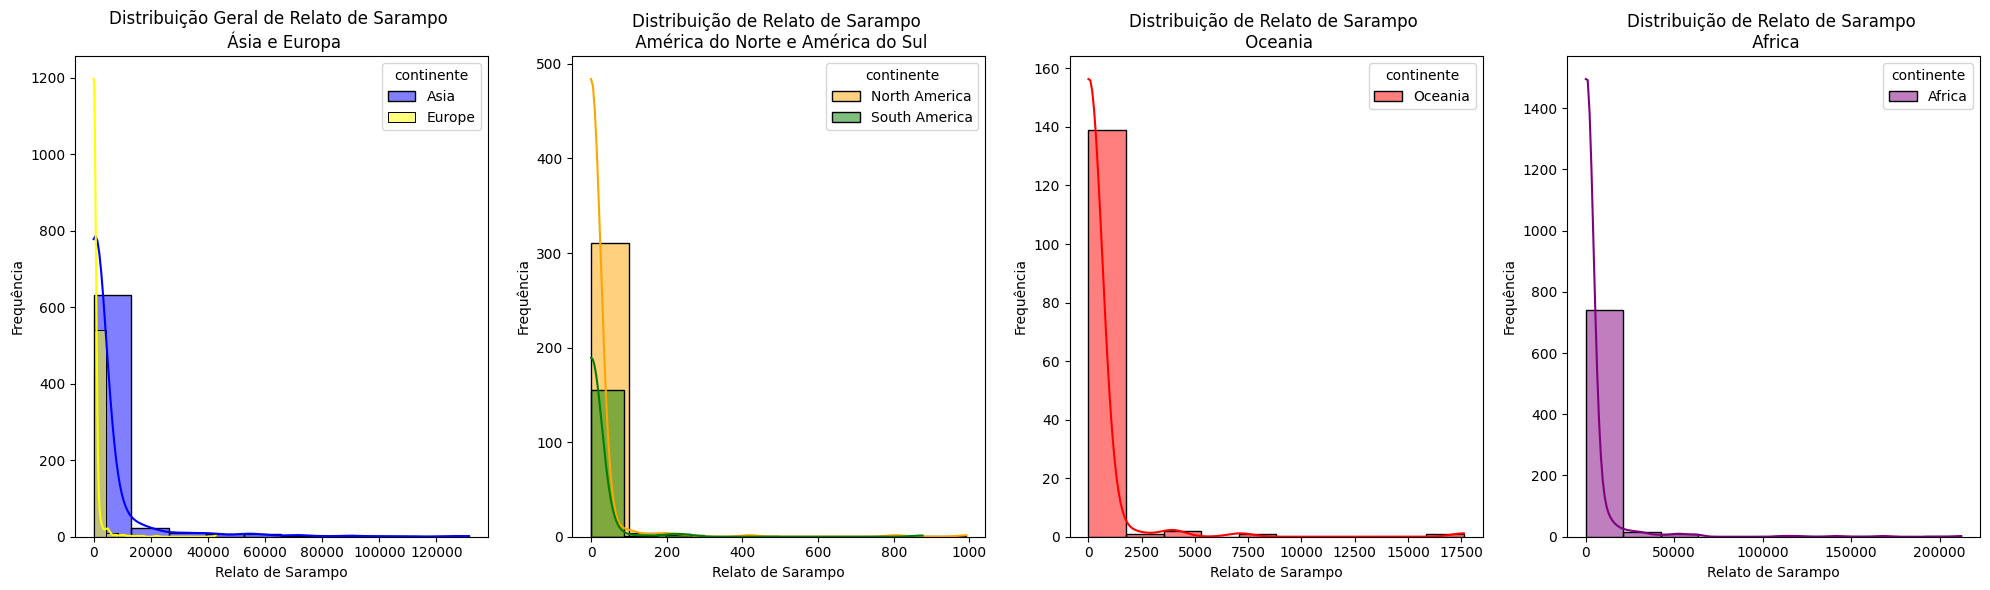

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a figura e os subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Gráfico 1: Distribuição geral de Relato de Sarampo
sns.histplot(df_cleaned[df_cleaned['continente'] == 'Asia']['relato_sarampo'], 
             kde=True, bins=10, color='blue', label='Asia', ax=axes[0])
sns.histplot(df_cleaned[df_cleaned['continente'] == 'Europe']['relato_sarampo'], 
             kde=True, bins=10, color='yellow', label='Europe', ax=axes[0])
axes[0].set_title('Distribuição Geral de Relato de Sarampo \n Ásia e Europa')
axes[0].set_xlabel('Relato de Sarampo')
axes[0].set_ylabel('Frequência')
axes[0].legend(title='continente')

# Gráfico 2: Distribuição de Relato de Sarampo por continente (Asia vs Europe)
sns.histplot(df_cleaned[df_cleaned['continente'] == 'North America']['relato_sarampo'], 
             kde=True, bins=10, color='orange', label='North America', ax=axes[1])
sns.histplot(df_cleaned[df_cleaned['continente'] == 'South America']['relato_sarampo'], 
             kde=True, bins=10, color='green', label='South America', ax=axes[1])

# Configurações do segundo gráfico
axes[1].set_title('Distribuição de Relato de Sarampo \n América do Norte e América do Sul')
axes[1].set_xlabel('Relato de Sarampo')
axes[1].set_ylabel('Frequência')
axes[1].legend(title='continente')

sns.histplot(df_cleaned[df_cleaned['continente'] == 'Oceania']['relato_sarampo'], 
             kde=True, bins=10, color='red', label='Oceania', ax=axes[2])

# Configurações do segundo gráfico
axes[2].set_title('Distribuição de Relato de Sarampo \n Oceania')
axes[2].set_xlabel('Relato de Sarampo')
axes[2].set_ylabel('Frequência')
axes[2].legend(title='continente')

sns.histplot(df_cleaned[df_cleaned['continente'] == 'Africa']['relato_sarampo'], 
             kde=True, bins=10, color='purple', label='Africa', ax=axes[3])

# Configurações do segundo gráfico
axes[3].set_title('Distribuição de Relato de Sarampo \n Africa')
axes[3].set_xlabel('Relato de Sarampo')
axes[3].set_ylabel('Frequência')
axes[3].legend(title='continente')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


      continente  relato_sarampo
0         Africa         2537793
1           Asia         3095827
2         Europe          289804
3  North America            3779
4        Oceania           41927
5  South America            2065


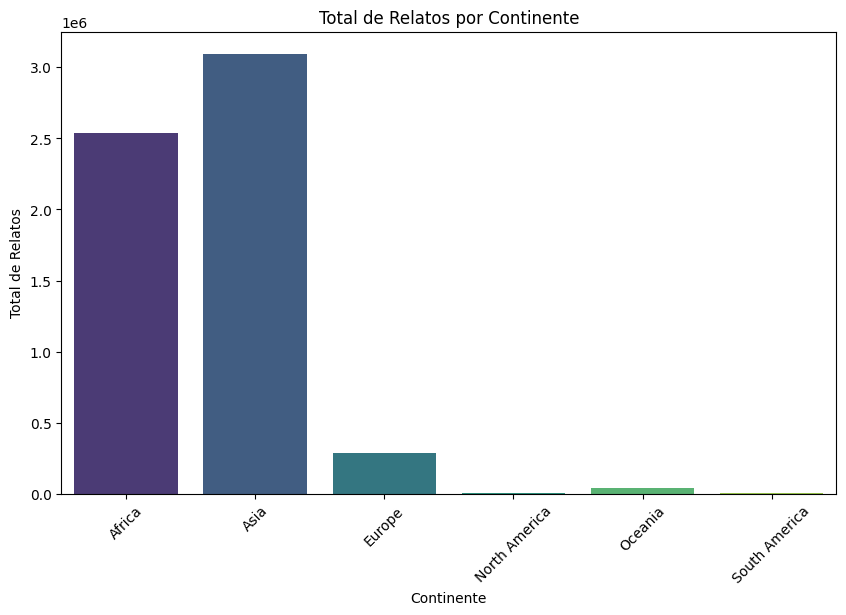

In [175]:
# Somando relatos por continente
continente_relatos = df_cleaned.groupby('continente')['relato_sarampo'].sum().reset_index()

# Exibindo o DataFrame de continentes
print(continente_relatos)

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=continente_relatos, x='continente', y='relato_sarampo', palette='viridis')
plt.title('Total de Relatos por Continente')
plt.xlabel('Continente')
plt.ylabel('Total de Relatos')
plt.xticks(rotation=45)
plt.show()

In [97]:
df_cleaned.columns

Index(['pais', 'ano', 'status', 'expectativa_vida', 'mortalidade_adulta',
       'mortes_infanis', 'consumo_alcool', 'pct_despesa_saude_pib',
       'relato_sarampo', 'IMC', 'mortalidade_5anos',
       'vacina_poliomelite_crianca', 'pct_despesa_saude',
       'vacina_difteria_crianca', 'morte_HIV_4anos', 'magreza_10_19',
       'magreza_5_9', 'composicao_recursos_renda', 'escolaridade',
       'continente'],
      dtype='object')

In [199]:
df_cleaned['relato_sarampo'].describe()

count      2736.000000
mean       2200.989035
std       10613.363164
min           0.000000
25%           0.000000
50%          14.000000
75%         323.750000
max      212183.000000
Name: relato_sarampo, dtype: float64

In [117]:
import pandas as pd

# Função para verificar se há um valor 0 antes ou depois de um valor >= à média de cada país
def check_high_and_zero(group, variavel):
    media = df_cleaned.groupby('pais')[variavel].mean()  # Calcula a média da variavel por pais
    valor = df_cleaned[variavel].describe()['50%'] # Obtém a mediana da variável geral
    media_pais = media[group.name]  # Obtém a média da variavel daquele país
    zero_found = False  # Indica se encontramos um valor zero
    high_found = False  # Indica se encontramos um valor acima da média

    for val in group[variavel]:
        if val == 0:
            zero_found = True  # Marcamos que encontramos um zero
        if (media_pais > valor) & (val > media_pais):
            high_found = True  # Marcamos que encontramos um valor >= média
            
        # Se encontramos ambos, em qualquer ordem, retornamos True
        if zero_found and high_found:
            return True
    
    return False

# Aplicar a função em cada grupo de país
result = df_cleaned.groupby('pais').apply(check_high_and_zero, 'relato_sarampo') # composicao_recursos_renda, pct_despesa_saude_pib

print(result[result == True].index)


Index(['Albania', 'Algeria', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Belarus', 'Belgium', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burundi', 'Cambodia', 'Comoros', 'Croatia',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Equatorial Guinea', 'Eritrea', 'Fiji', 'France', 'Gabon', 'Gambia',
       'Germany', 'Greece', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Ireland',
       'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Kyrgyzstan', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Madagascar',
       'Malawi', 'Maldives', 'Mauritania', 'Mauritius', 'Mongolia', 'Morocco',
       'Namibia', 'Netherlands', 'New Zealand', 'Papua New Guinea', 'Poland',
       'Qatar', 'Saudi Arabia', 'Senegal', 'Serbia', 'Sierra Leone',
       'Singapore', 'Spain', 'Sri Lanka', 'Swaziland', 'Switzerland',
       'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan',
       'Ukraine', 'United Arab Emirates', 

In [99]:
result[result == True].index

Index([], dtype='object', name='pais')

In [92]:
df_cleaned[df_cleaned['pais'] == 'Algeria']

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
32,Algeria,2015,Developing,75.6,19.0,21,0.406667,0.000000,63,59.5,24,95.0,0.406667,95.0,0.1,6.0,5.8,0.743,14.4,Africa
33,Algeria,2014,Developing,75.4,11.0,21,0.010000,54.237318,0,58.4,24,95.0,7.210000,95.0,0.1,6.0,5.8,0.741,14.4,Africa
34,Algeria,2013,Developing,75.3,112.0,21,0.530000,544.450743,25,57.2,24,95.0,7.120000,95.0,0.1,5.9,5.8,0.737,14.4,Africa
35,Algeria,2012,Developing,75.1,113.0,21,0.660000,555.926083,18,56.1,24,95.0,6.140000,95.0,0.1,5.9,5.8,0.732,14.4,Africa
36,Algeria,2011,Developing,74.9,116.0,21,0.560000,509.002041,112,55.0,24,95.0,5.290000,95.0,0.1,5.9,5.8,0.724,14.0,Africa
37,Algeria,2010,Developing,74.7,119.0,21,0.450000,430.717586,103,53.9,24,95.0,5.120000,95.0,0.1,5.9,5.8,0.714,13.6,Africa
38,Algeria,2009,Developing,74.4,123.0,20,0.500000,352.063642,107,52.8,23,94.0,5.360000,95.0,0.1,6.0,5.9,0.705,13.1,Africa
39,Algeria,2008,Developing,74.1,126.0,20,0.460000,43.087173,217,51.8,23,92.0,4.200000,93.0,0.1,6.0,5.9,0.697,12.6,Africa
40,Algeria,2007,Developing,73.8,129.0,20,0.440000,320.323924,0,5.8,23,95.0,3.820000,95.0,0.1,6.0,5.9,0.690,12.3,Africa
41,Algeria,2006,Developing,73.4,132.0,20,0.360000,270.240196,944,49.8,23,95.0,3.360000,95.0,0.1,6.1,6.0,0.686,12.3,Africa


In [126]:
# Agora, vamos substituir os 0's pela média do país para os países que atendem à condição
def substituir_zero_por_media(group, variavel):
    media = df_cleaned.groupby('pais')[variavel].median() # Calcula a média da variavel por pais
    if result[group.name]:  # Verifica se a condição foi atendida para o país
        media_pais = media[group.name]  # Obtém a média do país
        # Substituir valores 0 pela média do país
        group[variavel] = group[variavel].replace(0, media_pais)
    return group

# Aplicar a função de substituição em cada grupo
df_cleaned2 = df_cleaned.groupby('pais').apply(substituir_zero_por_media, 'relato_sarampo')

df_cleaned2.reset_index(drop=True, inplace=True)
df_cleaned2[df_cleaned2['pais'] == 'Algeria']

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
32,Algeria,2015,Developing,75.6,19.0,21,0.406667,0.000000,63.0,59.5,24,95.0,0.406667,95.0,0.1,6.0,5.8,0.743,14.4,Africa
33,Algeria,2014,Developing,75.4,11.0,21,0.010000,54.237318,109.5,58.4,24,95.0,7.210000,95.0,0.1,6.0,5.8,0.741,14.4,Africa
34,Algeria,2013,Developing,75.3,112.0,21,0.530000,544.450743,25.0,57.2,24,95.0,7.120000,95.0,0.1,5.9,5.8,0.737,14.4,Africa
35,Algeria,2012,Developing,75.1,113.0,21,0.660000,555.926083,18.0,56.1,24,95.0,6.140000,95.0,0.1,5.9,5.8,0.732,14.4,Africa
36,Algeria,2011,Developing,74.9,116.0,21,0.560000,509.002041,112.0,55.0,24,95.0,5.290000,95.0,0.1,5.9,5.8,0.724,14.0,Africa
37,Algeria,2010,Developing,74.7,119.0,21,0.450000,430.717586,103.0,53.9,24,95.0,5.120000,95.0,0.1,5.9,5.8,0.714,13.6,Africa
38,Algeria,2009,Developing,74.4,123.0,20,0.500000,352.063642,107.0,52.8,23,94.0,5.360000,95.0,0.1,6.0,5.9,0.705,13.1,Africa
39,Algeria,2008,Developing,74.1,126.0,20,0.460000,43.087173,217.0,51.8,23,92.0,4.200000,93.0,0.1,6.0,5.9,0.697,12.6,Africa
40,Algeria,2007,Developing,73.8,129.0,20,0.440000,320.323924,109.5,5.8,23,95.0,3.820000,95.0,0.1,6.0,5.9,0.690,12.3,Africa
41,Algeria,2006,Developing,73.4,132.0,20,0.360000,270.240196,944.0,49.8,23,95.0,3.360000,95.0,0.1,6.1,6.0,0.686,12.3,Africa


<Axes: xlabel='relato_sarampo', ylabel='Count'>

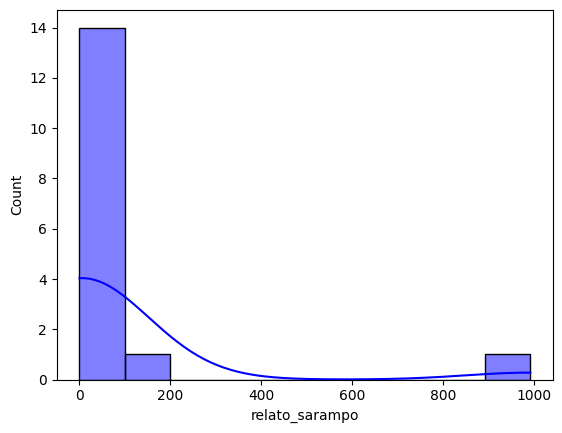

In [205]:
## Quero plotar um boxplot para relato de sarampo para esse pais
sns.histplot(data=df_cleaned[df_cleaned['pais'] == 'Haiti'], x='relato_sarampo', kde=True, bins=10, color='blue')

In [165]:
import pandas as pd

# Função para identificar outliers por país
def identificar_outliers(group, variavel):
    # Calcula os quartis para o grupo (país)
    Q1 = group[variavel].quantile(0.25)
    Q3 = group[variavel].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir limites para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 3.5 * IQR
    
    # Identificar valores abaixo de Q1 - 1.5 * IQR ou acima de Q3 + 1.5 * IQR
    outliers_inferiores = group[group[variavel] < limite_inferior]
    outliers_superiores = group[group[variavel] > limite_superior]
    
    # Retorna um dataframe com os outliers encontrados
    return pd.concat([outliers_inferiores, outliers_superiores])

# Aplicar a função em cada grupo de país
outliers_por_pais = df_cleaned2.groupby('pais').apply(identificar_outliers, 'relato_sarampo')

outliers_por_pais.reset_index(drop=True, inplace=True)
outliers_por_pais.pais.value_counts()
outliers_por_pais.head(50)


,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
0,Albania,2006,Developing,74.2,99.0,1,5.310000,3.302154,68.0,5.8,1,97.0,5.860000,97.0,0.1,1.7,1.8,0.696,11.4,Europe
1,Albania,2000,Developing,72.6,11.0,1,3.660000,91.711541,662.0,45.0,1,97.0,6.260000,97.0,0.1,2.1,2.2,0.656,10.7,Europe
2,Algeria,2003,Developing,71.7,146.0,20,0.340000,25.018523,15374.0,47.0,23,87.0,3.600000,87.0,0.1,6.3,6.1,0.663,11.5,Africa
3,Argentina,2010,Developing,75.5,121.0,10,8.150000,187.610955,17.0,59.8,11,95.0,6.550000,94.0,0.1,1.0,0.9,0.802,16.8,South America
4,Armenia,2005,Developing,73.0,137.0,1,4.250000,20.218228,2281.0,48.8,1,92.0,5.250000,9.0,0.1,2.0,2.1,0.679,10.9,Asia
5,Armenia,2004,Developing,73.0,132.0,1,3.810000,97.740877,1783.0,48.4,1,93.0,5.500000,91.0,0.1,2.0,2.1,0.668,10.9,Asia
6,Austria,2015,Developed,81.5,65.0,0,12.236000,0.000000,309.0,57.6,0,93.0,12.236000,93.0,0.1,1.9,2.1,0.892,15.9,Europe
7,Austria,2008,Developed,84.0,76.0,0,12.000000,8329.731655,448.0,54.2,0,83.0,1.600000,83.0,0.1,1.7,1.9,0.864,15.1,Europe
8,Azerbaijan,2002,Developing,67.8,146.0,7,0.550000,39.332537,4353.0,43.1,9,8.0,4.470000,76.0,0.1,3.1,3.1,0.651,10.6,Asia
9,Bahrain,2014,Developing,76.8,7.0,0,1.570000,367.255674,46.0,62.9,0,98.0,4.980000,98.0,0.1,6.1,6.0,0.820,14.5,Asia


In [170]:
import pandas as pd

# Função para identificar e substituir outliers por mediana por país
def substituir_outliers_por_mediana(group, variavel):
    # Calcula os quartis e a mediana para o grupo (país)
    Q1 = group[variavel].quantile(0.25)
    Q3 = group[variavel].quantile(0.75)
    IQR = Q3 - Q1
    mediana_pais = group[variavel].median()  # Mediana do país

    # Definir limites para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Substituir valores abaixo de Q1 - 1.5 * IQR ou acima de Q3 + 1.5 * IQR pela mediana
    group.loc[group[variavel] < limite_inferior, variavel] = mediana_pais
    group.loc[group[variavel] > limite_superior, variavel] = mediana_pais
    
    return group

# Aplicar a função em cada grupo de país
df_cleaned3 = df_cleaned2.groupby('pais').apply(substituir_outliers_por_mediana, 'relato_sarampo')

df_cleaned3.reset_index(drop=True, inplace=True)
df_cleaned3[df_cleaned3['pais'] == 'Algeria']


,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
32,Algeria,2015,Developing,75.6,19.0,21,0.406667,0.000000,63.00,59.5,24,95.0,0.406667,95.0,0.1,6.0,5.8,0.743,14.4,Africa
33,Algeria,2014,Developing,75.4,11.0,21,0.010000,54.237318,109.50,58.4,24,95.0,7.210000,95.0,0.1,6.0,5.8,0.741,14.4,Africa
34,Algeria,2013,Developing,75.3,112.0,21,0.530000,544.450743,25.00,57.2,24,95.0,7.120000,95.0,0.1,5.9,5.8,0.737,14.4,Africa
35,Algeria,2012,Developing,75.1,113.0,21,0.660000,555.926083,18.00,56.1,24,95.0,6.140000,95.0,0.1,5.9,5.8,0.732,14.4,Africa
36,Algeria,2011,Developing,74.9,116.0,21,0.560000,509.002041,112.00,55.0,24,95.0,5.290000,95.0,0.1,5.9,5.8,0.724,14.0,Africa
37,Algeria,2010,Developing,74.7,119.0,21,0.450000,430.717586,103.00,53.9,24,95.0,5.120000,95.0,0.1,5.9,5.8,0.714,13.6,Africa
38,Algeria,2009,Developing,74.4,123.0,20,0.500000,352.063642,107.00,52.8,23,94.0,5.360000,95.0,0.1,6.0,5.9,0.705,13.1,Africa
39,Algeria,2008,Developing,74.1,126.0,20,0.460000,43.087173,217.00,51.8,23,92.0,4.200000,93.0,0.1,6.0,5.9,0.697,12.6,Africa
40,Algeria,2007,Developing,73.8,129.0,20,0.440000,320.323924,109.50,5.8,23,95.0,3.820000,95.0,0.1,6.0,5.9,0.690,12.3,Africa
41,Algeria,2006,Developing,73.4,132.0,20,0.360000,270.240196,944.00,49.8,23,95.0,3.360000,95.0,0.1,6.1,6.0,0.686,12.3,Africa


___
## Trabalhando com a variável mortalidade_adulta
___

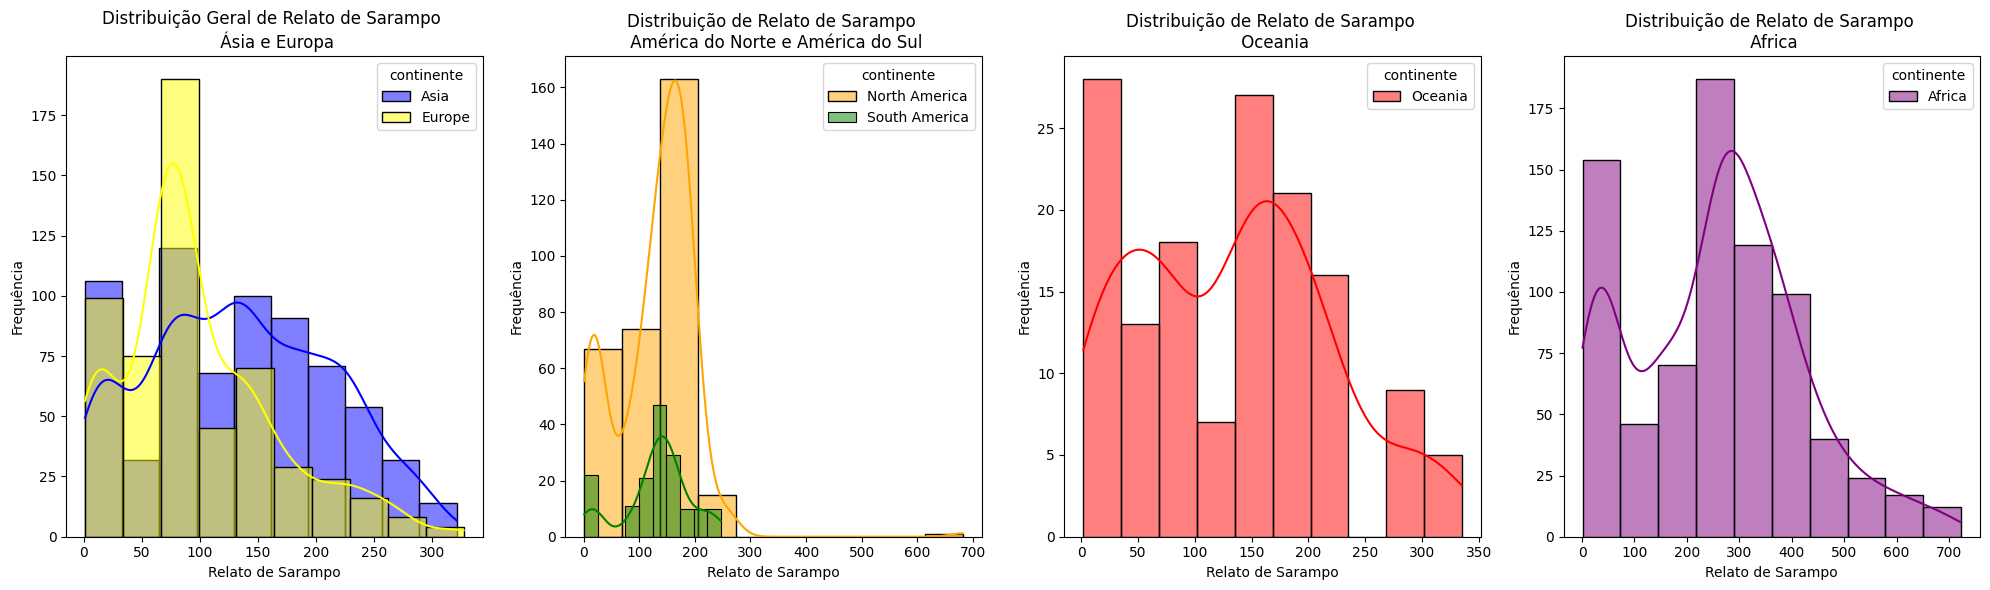

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a figura e os subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Gráfico 1: Distribuição geral de Relato de Sarampo
sns.histplot(df_cleaned[df_cleaned['continente'] == 'Asia']['mortalidade_adulta'], 
             kde=True, bins=10, color='blue', label='Asia', ax=axes[0])
sns.histplot(df_cleaned[df_cleaned['continente'] == 'Europe']['mortalidade_adulta'], 
             kde=True, bins=10, color='yellow', label='Europe', ax=axes[0])
axes[0].set_title('Distribuição Geral de Relato de Sarampo \n Ásia e Europa')
axes[0].set_xlabel('Relato de Sarampo')
axes[0].set_ylabel('Frequência')
axes[0].legend(title='continente')

# Gráfico 2: Distribuição de Relato de Sarampo por continente (Asia vs Europe)
sns.histplot(df_cleaned[df_cleaned['continente'] == 'North America']['mortalidade_adulta'], 
             kde=True, bins=10, color='orange', label='North America', ax=axes[1])
sns.histplot(df_cleaned[df_cleaned['continente'] == 'South America']['mortalidade_adulta'], 
             kde=True, bins=10, color='green', label='South America', ax=axes[1])

# Configurações do segundo gráfico
axes[1].set_title('Distribuição de Relato de Sarampo \n América do Norte e América do Sul')
axes[1].set_xlabel('Relato de Sarampo')
axes[1].set_ylabel('Frequência')
axes[1].legend(title='continente')

sns.histplot(df_cleaned[df_cleaned['continente'] == 'Oceania']['mortalidade_adulta'], 
             kde=True, bins=10, color='red', label='Oceania', ax=axes[2])

# Configurações do segundo gráfico
axes[2].set_title('Distribuição de Relato de Sarampo \n Oceania')
axes[2].set_xlabel('Relato de Sarampo')
axes[2].set_ylabel('Frequência')
axes[2].legend(title='continente')

sns.histplot(df_cleaned[df_cleaned['continente'] == 'Africa']['mortalidade_adulta'], 
             kde=True, bins=10, color='purple', label='Africa', ax=axes[3])

# Configurações do segundo gráfico
axes[3].set_title('Distribuição de Relato de Sarampo \n Africa')
axes[3].set_xlabel('Relato de Sarampo')
axes[3].set_ylabel('Frequência')
axes[3].legend(title='continente')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


      continente  mortalidade_adulta
0         Africa            200070.0
1           Asia             92115.0
2         Europe             54547.0
3  North America             41445.0
4        Oceania             19149.0
5  South America             21263.0


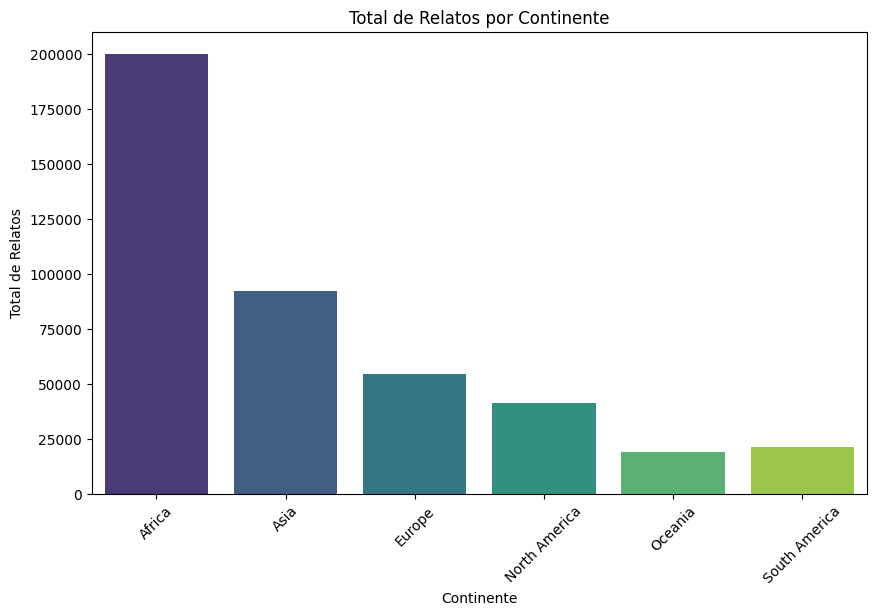

In [208]:
# Somando relatos por continente
continente_relatos = df_cleaned.groupby('continente')['mortalidade_adulta'].sum().reset_index()

# Exibindo o DataFrame de continentes
print(continente_relatos)

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=continente_relatos, x='continente', y='mortalidade_adulta', palette='viridis')
plt.title('Total de Relatos por Continente')
plt.xlabel('Continente')
plt.ylabel('Total de Relatos')
plt.xticks(rotation=45)
plt.show()

In [209]:
# Aplicar a função em cada grupo de país
result_mortalidade_adulta = df_cleaned.groupby('pais').apply(check_high_and_zero, 'mortalidade_adulta') # composicao_recursos_renda, pct_despesa_saude_pib

print(result_mortalidade_adulta[result_mortalidade_adulta == True].index)


Index([], dtype='object', name='pais')


In [212]:
# Aplicar a função em cada grupo de país
outliers_por_pais_moratlidade_adulto = df_cleaned2.groupby('pais').apply(identificar_outliers, 'mortalidade_adulta')

outliers_por_pais_moratlidade_adulto.reset_index(drop=True, inplace=True)
outliers_por_pais_moratlidade_adulto.pais.value_counts()
outliers_por_pais_moratlidade_adulto.head(20)

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
0,Afghanistan,2002,Developing,56.2,3.0,88,0.010000,16.887351,2486.0,13.0,122,36.0,7.760000,36.0,0.1,19.9,2.2,0.341,6.2,Asia
1,Algeria,2015,Developing,75.6,19.0,21,0.406667,0.000000,63.0,59.5,24,95.0,0.406667,95.0,0.1,6.0,5.8,0.743,14.4,Africa
2,Algeria,2014,Developing,75.4,11.0,21,0.010000,54.237318,109.5,58.4,24,95.0,7.210000,95.0,0.1,6.0,5.8,0.741,14.4,Africa
3,Algeria,2004,Developing,72.3,14.0,19,0.450000,220.393699,3289.0,47.9,23,86.0,3.540000,86.0,0.1,6.2,6.1,0.673,11.7,Africa
4,Angola,2001,Developing,45.7,44.0,97,2.580000,30.359936,9046.0,15.8,159,41.0,5.380000,38.0,2.1,1.7,1.7,0.391,5.1,Africa
5,Angola,2000,Developing,45.3,48.0,97,1.850000,15.881493,2219.0,15.4,160,3.0,2.790000,28.0,2.0,1.9,1.9,0.382,4.6,Africa
6,Antigua and Barbuda,2015,Developing,76.4,13.0,0,7.949333,0.000000,0.0,47.7,0,86.0,7.949333,99.0,0.2,3.3,3.3,0.784,13.9,North America
7,Antigua and Barbuda,2009,Developing,75.4,14.0,0,7.820000,149.358735,0.0,43.8,0,98.0,4.860000,99.0,0.1,3.4,3.3,0.788,14.2,North America
8,Argentina,2012,Developing,75.9,12.0,9,8.350000,1133.558003,2.0,61.0,10,99.0,5.200000,91.0,0.1,1.0,0.9,0.822,17.2,South America
9,Argentina,2011,Developing,75.7,12.0,9,8.110000,1504.329462,3.0,6.4,10,93.0,5.890000,91.0,0.1,1.0,0.9,0.816,17.1,South America


In [223]:
outliers_por_pais_moratlidade_adulto[outliers_por_pais_moratlidade_adulto['pais'] == 'Russian Federation']

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
181,Russian Federation,2006,Developing,66.4,3.0,17,11.79,12.251841,1147.0,55.7,20,98.0,5.30,98.0,0.3,2.4,2.7,0.754,13.8,Europe
182,Russian Federation,2001,Developing,65.1,38.0,21,10.47,2.642527,2072.0,54.2,25,97.0,5.67,96.0,0.3,2.8,3.0,0.720,12.5,Europe
183,Russian Federation,2000,Developing,65.0,37.0,22,10.18,224.460025,4800.0,54.0,26,97.0,5.42,96.0,0.2,2.9,3.0,0.709,12.1,Europe


In [222]:
df_cleaned2[df_cleaned2['pais'] == 'Russian Federation']

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
2032,Russian Federation,2015,Developing,75.0,222.0,13,11.128,0.000000,843.0,6.5,15,97.0,11.128,97.0,0.1,2.3,2.3,0.805,15.0,Europe
2033,Russian Federation,2014,Developing,73.0,225.0,13,10.120,1340.553699,4711.0,59.9,15,97.0,7.700,97.0,0.1,2.3,2.3,0.803,14.9,Europe
2034,Russian Federation,2013,Developing,70.0,229.0,14,10.580,1529.497771,2339.0,59.3,16,98.0,7.900,97.0,0.2,2.3,2.3,0.799,14.6,Europe
2035,Russian Federation,2012,Developing,69.6,237.0,14,10.990,178.822591,2123.0,58.7,16,98.0,6.880,97.0,0.3,2.3,2.4,0.792,14.3,Europe
2036,Russian Federation,2011,Developing,69.4,242.0,14,11.040,184.764931,629.0,58.1,17,97.0,6.610,97.0,0.3,2.3,2.4,0.785,14.0,Europe
2037,Russian Federation,2010,Developing,68.4,256.0,15,11.050,162.808805,129.0,57.5,17,98.0,6.830,97.0,0.2,2.3,2.5,0.773,13.7,Europe
2038,Russian Federation,2009,Developing,68.2,261.0,15,11.210,137.006336,101.0,57.0,18,98.0,7.440,98.0,0.3,2.3,2.5,0.776,14.0,Europe
2039,Russian Federation,2008,Developing,67.5,278.0,16,12.040,161.730165,27.0,56.6,18,98.0,6.220,98.0,0.3,2.3,2.5,0.769,13.9,Europe
2040,Russian Federation,2007,Developing,67.3,282.0,16,12.190,11.026172,173.0,56.1,19,98.0,5.380,98.0,0.3,2.4,2.6,0.761,13.8,Europe
2041,Russian Federation,2006,Developing,66.4,3.0,17,11.790,12.251841,1147.0,55.7,20,98.0,5.300,98.0,0.3,2.4,2.7,0.754,13.8,Europe


<Axes: xlabel='mortalidade_adulta', ylabel='Count'>

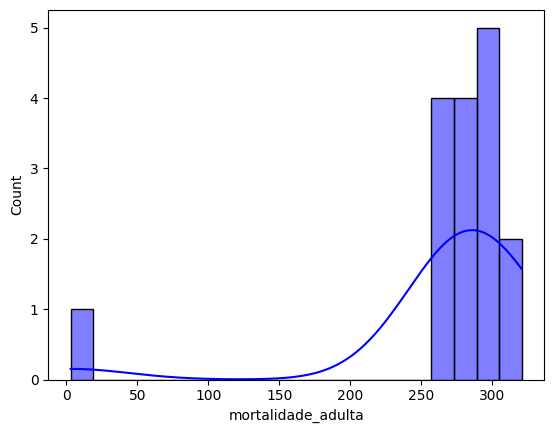

In [225]:
sns.histplot(data=df_cleaned[df_cleaned['pais'] == 'Afghanistan'], x='mortalidade_adulta', kde=True, bins=20, color='blue')

In [227]:
# Aplicar a função em cada grupo de país
df_cleaned4 = df_cleaned3.groupby('pais').apply(substituir_outliers_por_mediana, 'mortalidade_adulta')

df_cleaned4.reset_index(drop=True, inplace=True)
df_cleaned4[df_cleaned4['pais'] == 'Afghanistan']

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154.0,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492.0,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430.0,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787.0,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013.0,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,Asia
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,1989.0,16.7,102,66.0,9.20,66.0,0.1,18.4,18.4,0.448,9.2,Asia
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,2861.0,16.2,106,63.0,9.42,63.0,0.1,18.6,18.7,0.434,8.9,Asia
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,1599.0,15.7,110,64.0,8.33,64.0,0.1,18.8,18.9,0.433,8.7,Asia
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,1141.0,15.2,113,63.0,6.73,63.0,0.1,19.0,19.1,0.415,8.4,Asia
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,1990.0,14.7,116,58.0,7.43,58.0,0.1,19.2,19.3,0.405,8.1,Asia


___
## Trabalhando com a mortes_infanis
___

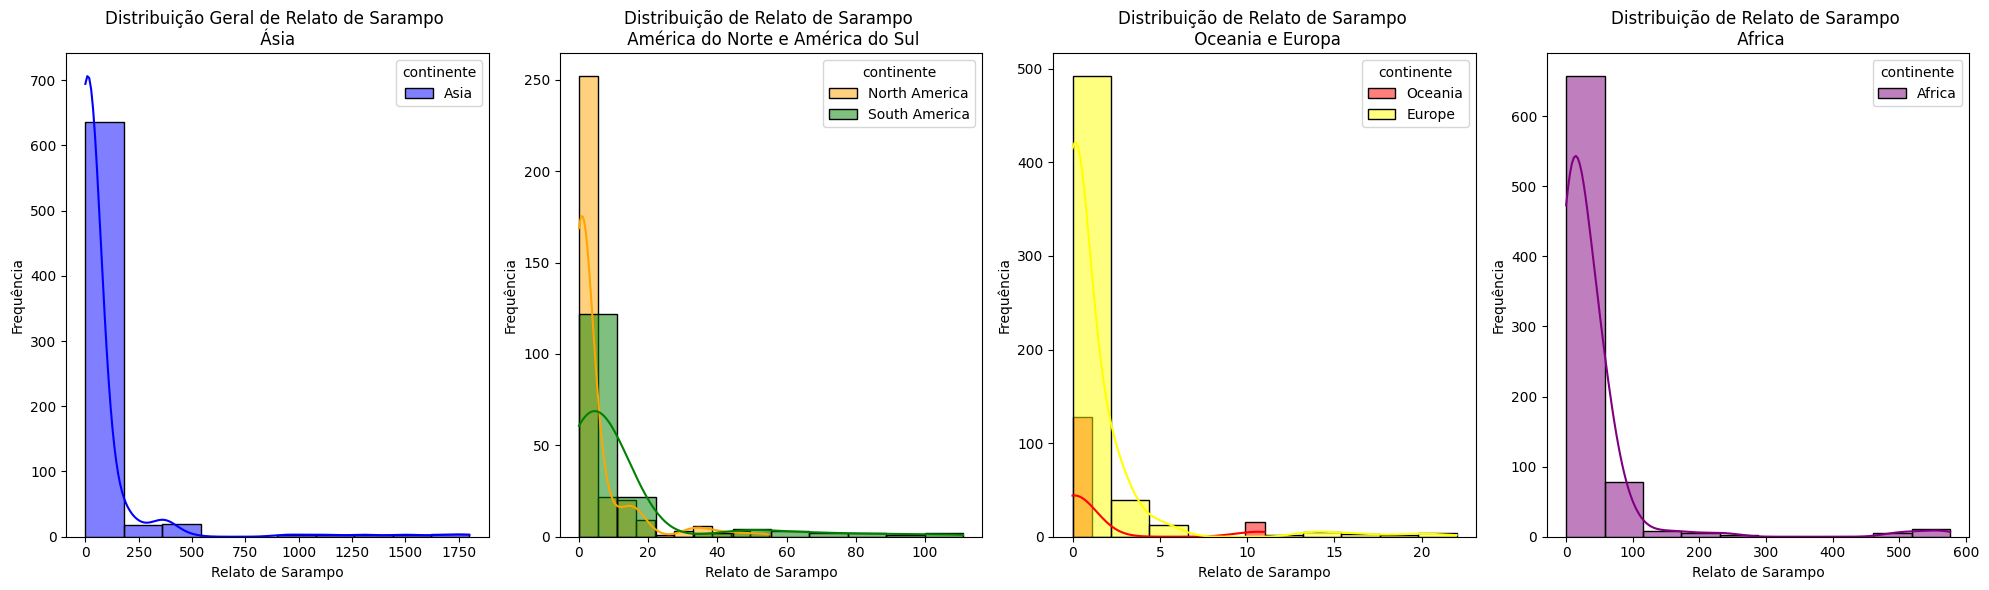

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a figura e os subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Gráfico 1: Distribuição geral de Relato de Sarampo
sns.histplot(df_cleaned[df_cleaned['continente'] == 'Asia']['mortes_infanis'], 
             kde=True, bins=10, color='blue', label='Asia', ax=axes[0])
axes[0].set_title('Distribuição Geral de Relato de Sarampo \n Ásia ')
axes[0].set_xlabel('Relato de Sarampo')
axes[0].set_ylabel('Frequência')
axes[0].legend(title='continente')

# Gráfico 2: Distribuição de Relato de Sarampo por continente (Asia vs Europe)
sns.histplot(df_cleaned[df_cleaned['continente'] == 'North America']['mortes_infanis'], 
             kde=True, bins=10, color='orange', label='North America', ax=axes[1])
sns.histplot(df_cleaned[df_cleaned['continente'] == 'South America']['mortes_infanis'], 
             kde=True, bins=10, color='green', label='South America', ax=axes[1])

# Configurações do segundo gráfico
axes[1].set_title('Distribuição de Relato de Sarampo \n América do Norte e América do Sul')
axes[1].set_xlabel('Relato de Sarampo')
axes[1].set_ylabel('Frequência')
axes[1].legend(title='continente')

sns.histplot(df_cleaned[df_cleaned['continente'] == 'Oceania']['mortes_infanis'], 
             kde=True, bins=10, color='red', label='Oceania', ax=axes[2])
sns.histplot(df_cleaned[df_cleaned['continente'] == 'Europe']['mortes_infanis'], 
             kde=True, bins=10, color='yellow', label='Europe', ax=axes[2])

# Configurações do segundo gráfico
axes[2].set_title('Distribuição de Relato de Sarampo \n Oceania e Europa')
axes[2].set_xlabel('Relato de Sarampo')
axes[2].set_ylabel('Frequência')
axes[2].legend(title='continente')

sns.histplot(df_cleaned[df_cleaned['continente'] == 'Africa']['mortes_infanis'], 
             kde=True, bins=10, color='purple', label='Africa', ax=axes[3])

# Configurações do segundo gráfico
axes[3].set_title('Distribuição de Relato de Sarampo \n Africa')
axes[3].set_xlabel('Relato de Sarampo')
axes[3].set_ylabel('Frequência')
axes[3].legend(title='continente')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


      continente  mortes_infanis
0         Africa           29693
1           Asia           45144
2         Europe             660
3  North America            1481
4        Oceania             186
5  South America            1884


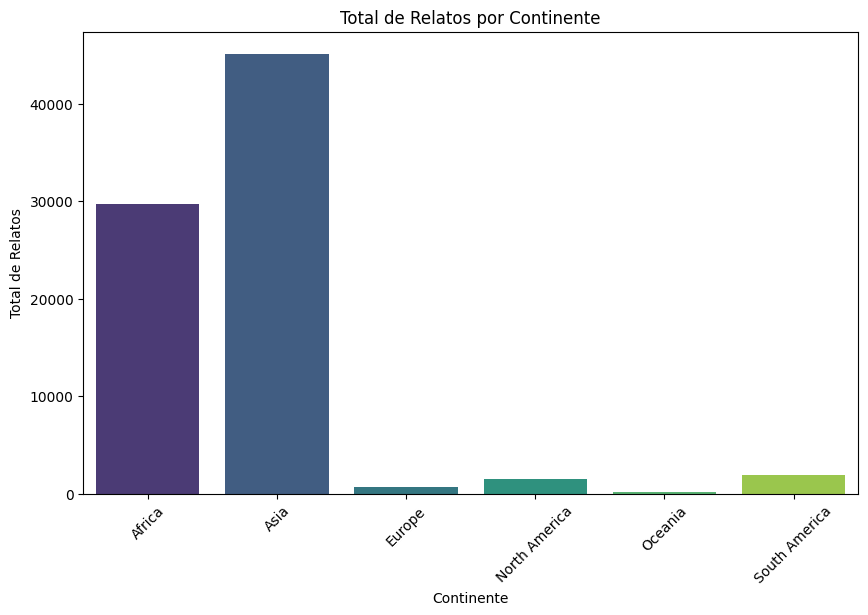

In [232]:
# Somando relatos por continente
continente_relatos = df_cleaned.groupby('continente')['mortes_infanis'].sum().reset_index()

# Exibindo o DataFrame de continentes
print(continente_relatos)

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=continente_relatos, x='continente', y='mortes_infanis', palette='viridis')
plt.title('Total de Relatos por Continente')
plt.xlabel('Continente')
plt.ylabel('Total de Relatos')
plt.xticks(rotation=45)
plt.show()

In [233]:
# Aplicar a função em cada grupo de país
result_mortes_infanis = df_cleaned.groupby('pais').apply(check_high_and_zero, 'mortes_infanis') # composicao_recursos_renda, pct_despesa_saude_pib

print(result_mortes_infanis[result_mortes_infanis == True].index)


Index([], dtype='object', name='pais')


In [242]:
# Aplicar a função em cada grupo de país
outliers_por_pais_mortes_infanis = df_cleaned2.groupby('pais').apply(identificar_outliers, 'mortes_infanis')

outliers_por_pais_mortes_infanis.reset_index(drop=True, inplace=True)
outliers_por_pais_mortes_infanis.pais.value_counts()
outliers_por_pais_mortes_infanis.pais.unique()

array(['Bulgaria', 'France', 'Georgia', 'Ghana', 'Greece', 'Israel',
       'Italy', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Libya',
       'Mauritania', 'Namibia', 'Pakistan', 'Panama', 'Paraguay',
       'Portugal', 'Ukraine'], dtype=object)

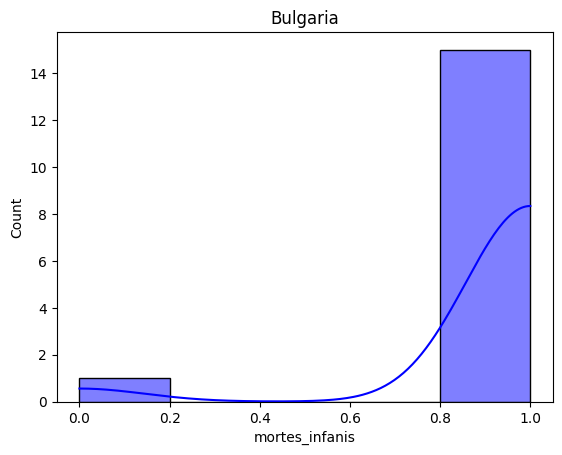

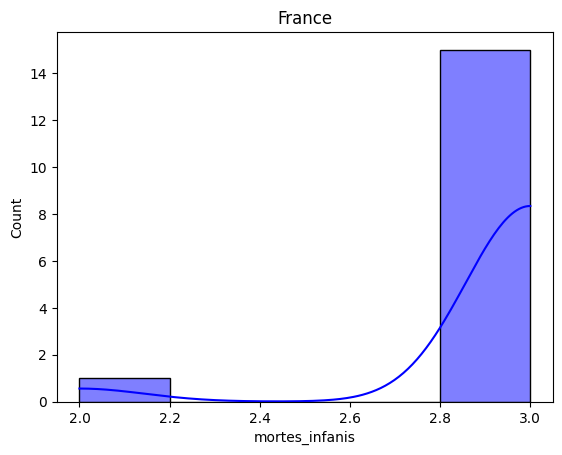

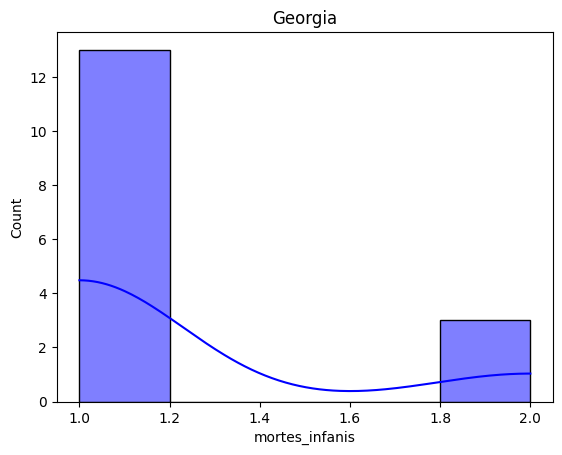

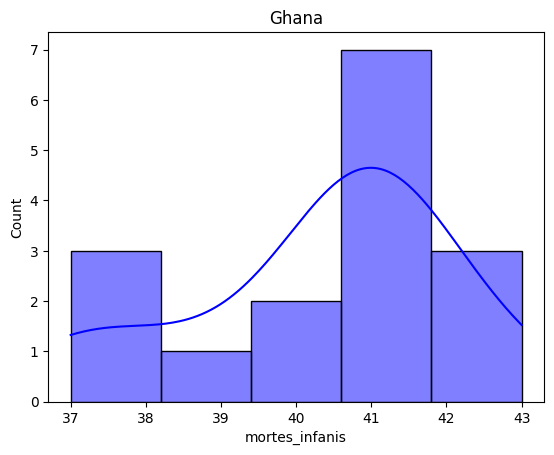

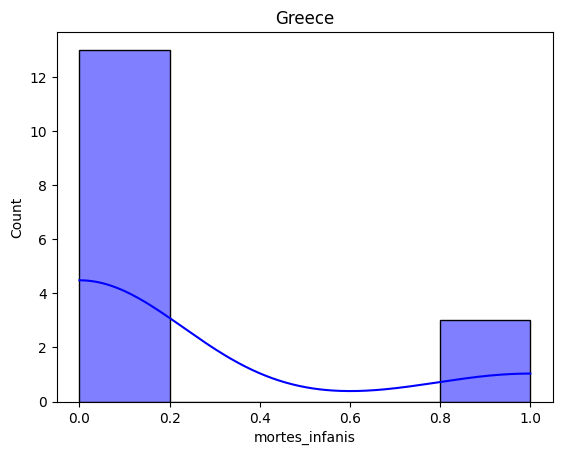

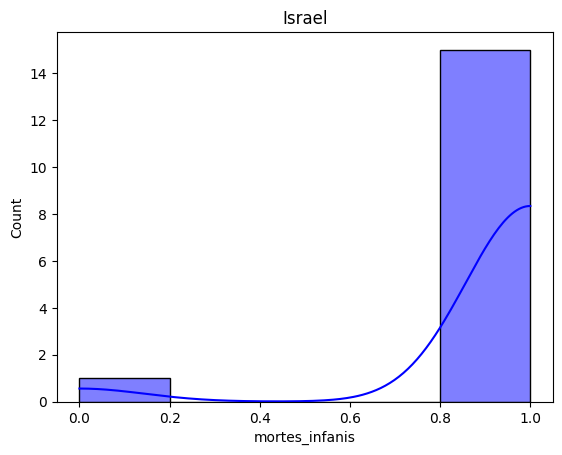

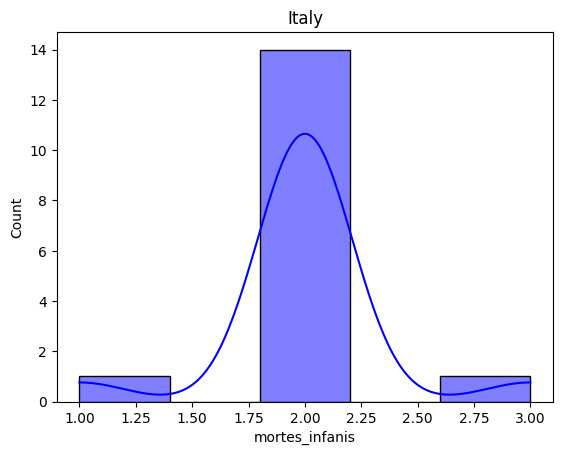

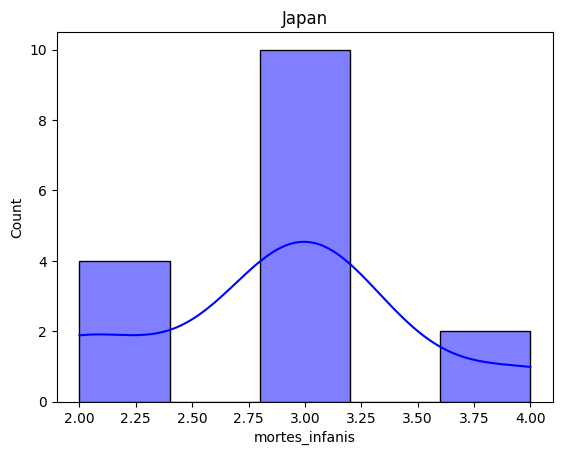

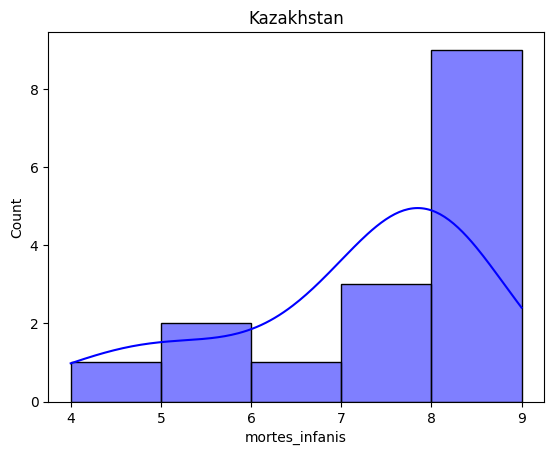

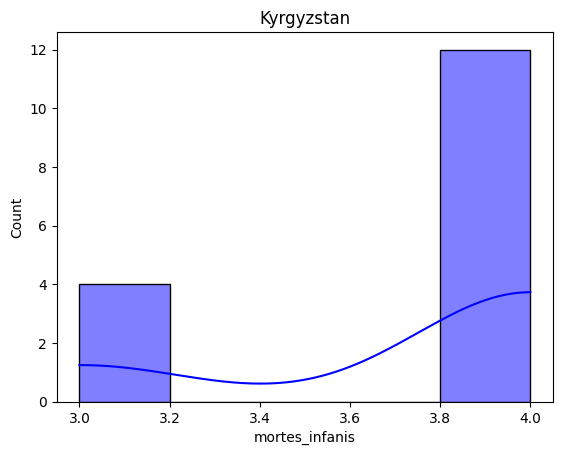

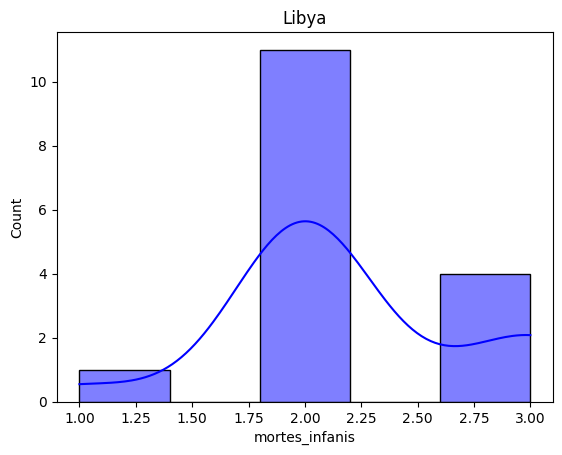

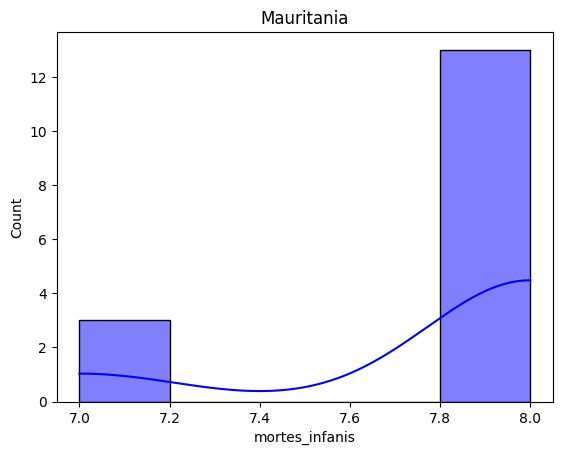

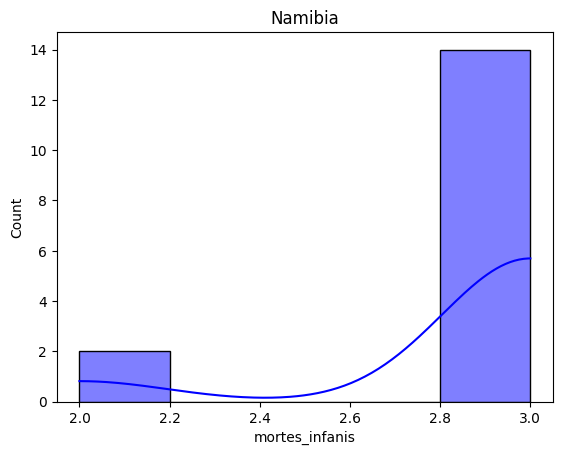

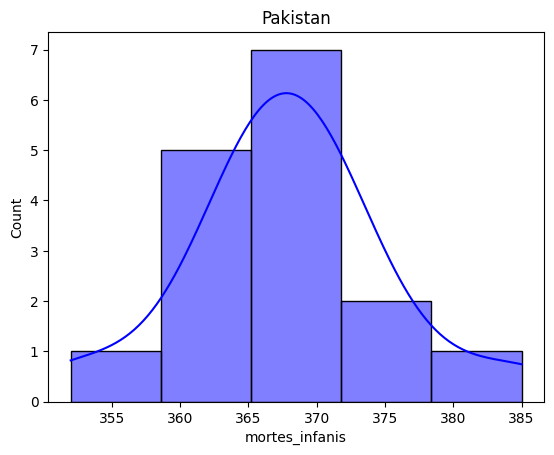

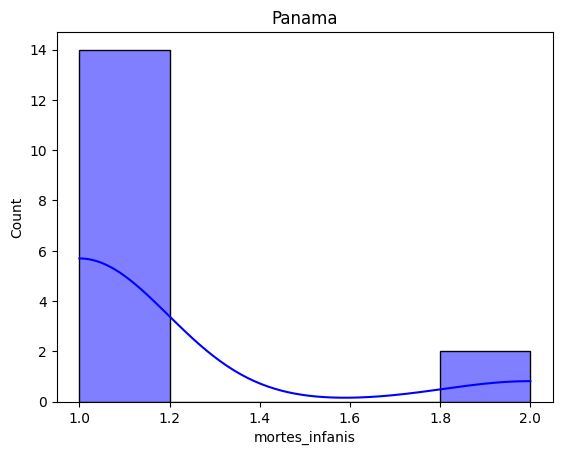

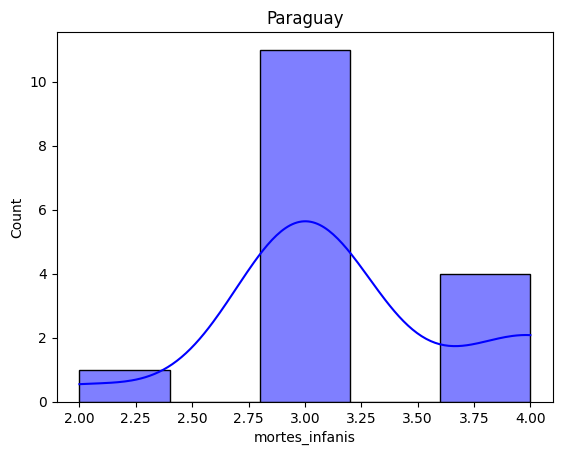

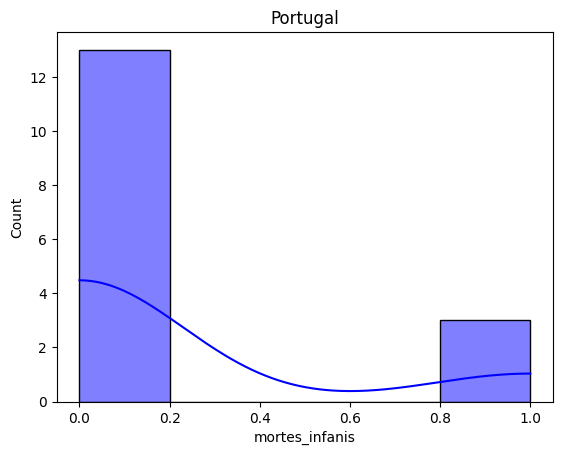

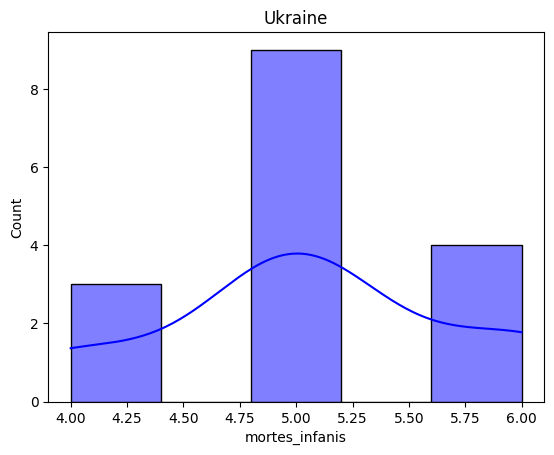

In [255]:
for pais in outliers_por_pais_mortes_infanis.pais.unique():
    sns.histplot(data=df_cleaned[df_cleaned['pais'] == pais], x='mortes_infanis', kde=True, bins=5, color='blue')
    plt.title(f'{pais}')
    plt.show()

___
## Trabalhando com a variável consumo_alcool
___

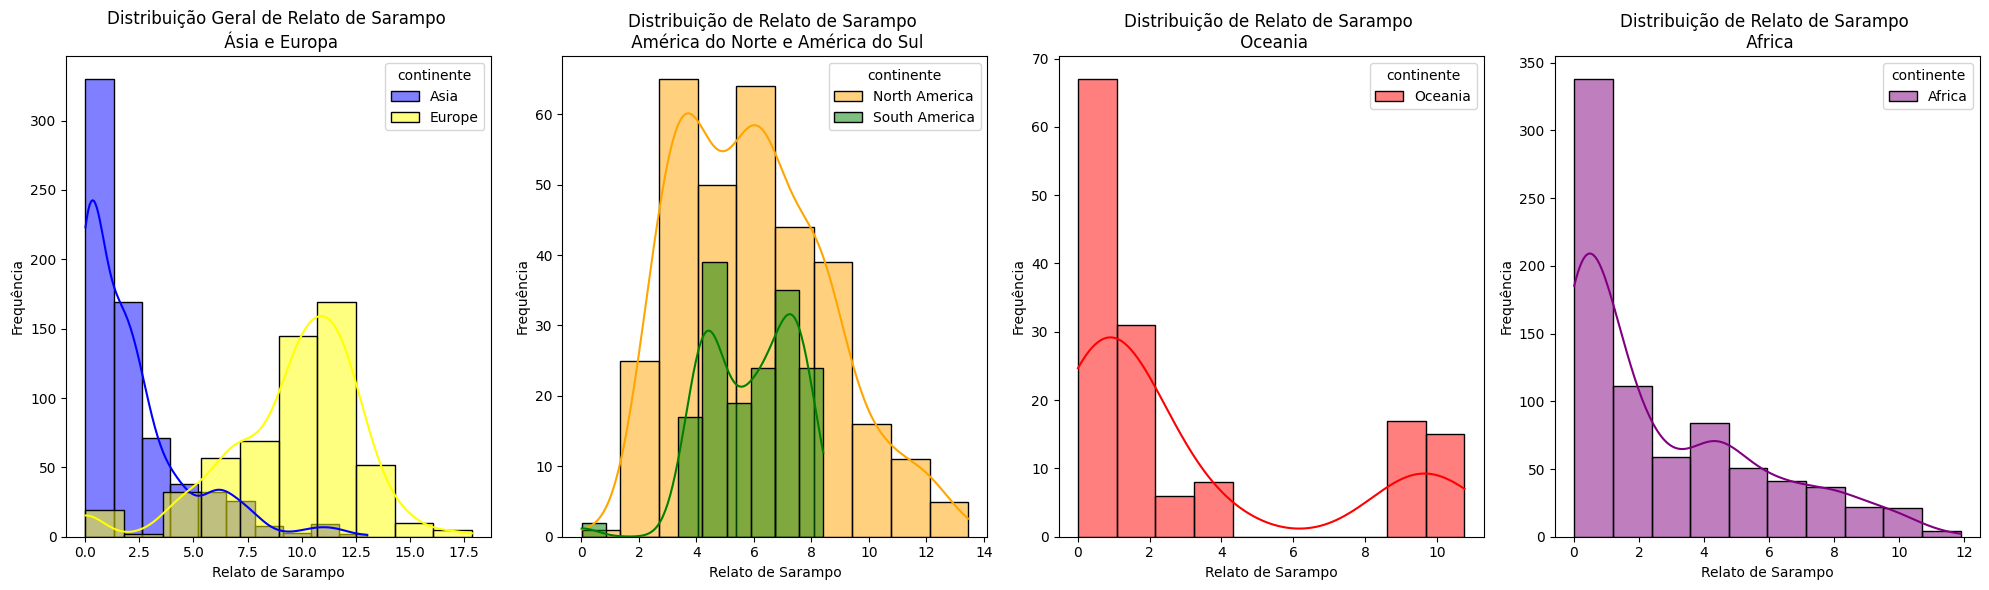

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a figura e os subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Gráfico 1: Distribuição geral de Relato de Sarampo
sns.histplot(df_cleaned[df_cleaned['continente'] == 'Asia']['consumo_alcool'], 
             kde=True, bins=10, color='blue', label='Asia', ax=axes[0])
sns.histplot(df_cleaned[df_cleaned['continente'] == 'Europe']['consumo_alcool'], 
             kde=True, bins=10, color='yellow', label='Europe', ax=axes[0])
axes[0].set_title('Distribuição Geral de Relato de Sarampo \n Ásia e Europa')
axes[0].set_xlabel('Relato de Sarampo')
axes[0].set_ylabel('Frequência')
axes[0].legend(title='continente')

# Gráfico 2: Distribuição de Relato de Sarampo por continente (Asia vs Europe)
sns.histplot(df_cleaned[df_cleaned['continente'] == 'North America']['consumo_alcool'], 
             kde=True, bins=10, color='orange', label='North America', ax=axes[1])
sns.histplot(df_cleaned[df_cleaned['continente'] == 'South America']['consumo_alcool'], 
             kde=True, bins=10, color='green', label='South America', ax=axes[1])

# Configurações do segundo gráfico
axes[1].set_title('Distribuição de Relato de Sarampo \n América do Norte e América do Sul')
axes[1].set_xlabel('Relato de Sarampo')
axes[1].set_ylabel('Frequência')
axes[1].legend(title='continente')

sns.histplot(df_cleaned[df_cleaned['continente'] == 'Oceania']['consumo_alcool'], 
             kde=True, bins=10, color='red', label='Oceania', ax=axes[2])

# Configurações do segundo gráfico
axes[2].set_title('Distribuição de Relato de Sarampo \n Oceania')
axes[2].set_xlabel('Relato de Sarampo')
axes[2].set_ylabel('Frequência')
axes[2].legend(title='continente')

sns.histplot(df_cleaned[df_cleaned['continente'] == 'Africa']['consumo_alcool'], 
             kde=True, bins=10, color='purple', label='Africa', ax=axes[3])

# Configurações do segundo gráfico
axes[3].set_title('Distribuição de Relato de Sarampo \n Africa')
axes[3].set_xlabel('Relato de Sarampo')
axes[3].set_ylabel('Frequência')
axes[3].legend(title='continente')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

      continente  consumo_alcool
0         Africa     2099.946667
1           Asia     1407.992667
2         Europe     5381.739905
3  North America     1910.794667
4        Oceania      436.548000
5  South America      940.053333


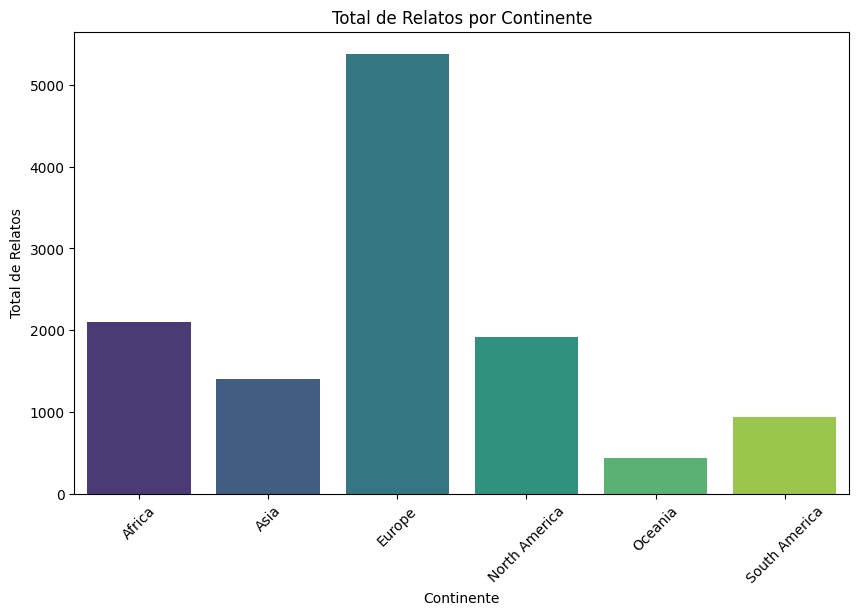

In [259]:
# Somando relatos por continente
continente_relatos = df_cleaned.groupby('continente')['consumo_alcool'].sum().reset_index()

# Exibindo o DataFrame de continentes
print(continente_relatos)

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=continente_relatos, x='continente', y='consumo_alcool', palette='viridis')
plt.title('Total de Relatos por Continente')
plt.xlabel('Continente')
plt.ylabel('Total de Relatos')
plt.xticks(rotation=45)
plt.show()

In [260]:
# Aplicar a função em cada grupo de país
result_consumo_alcool = df_cleaned.groupby('pais').apply(check_high_and_zero, 'consumo_alcool') # composicao_recursos_renda, pct_despesa_saude_pib

print(result_consumo_alcool[result_consumo_alcool == True].index)


Index([], dtype='object', name='pais')


In [261]:
# Aplicar a função em cada grupo de país
outliers_por_pais_consumo_alcool = df_cleaned2.groupby('pais').apply(identificar_outliers, 'consumo_alcool')

outliers_por_pais_consumo_alcool.reset_index(drop=True, inplace=True)
outliers_por_pais_consumo_alcool.pais.value_counts()
outliers_por_pais_consumo_alcool.pais.unique()

array(['Algeria', 'Austria', 'Bahrain', 'Belize', 'Benin', 'Bhutan',
       'Botswana', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', 'Cyprus', 'Dominican Republic', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Japan',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Latvia', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritius',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
       'Niger', 'Nigeria', 'Oman', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Samoa',
       'Sao Tome and Principe', 'Seychelles', 'Sierra Leone', 'Slovenia',
       'Solomon Islands', 'Spain', 'Swaziland', 'Syrian Arab Republic',
       'Tajikistan', 'Togo', 

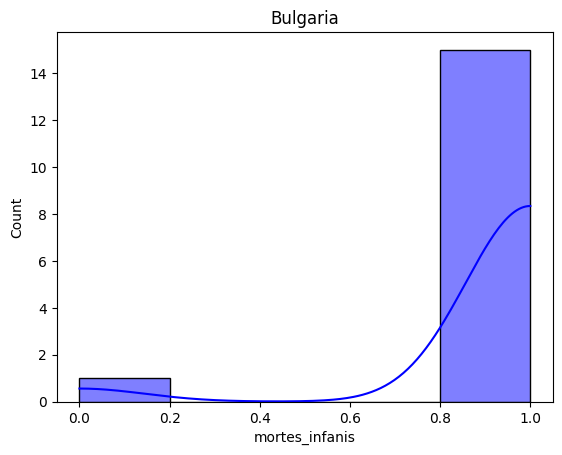

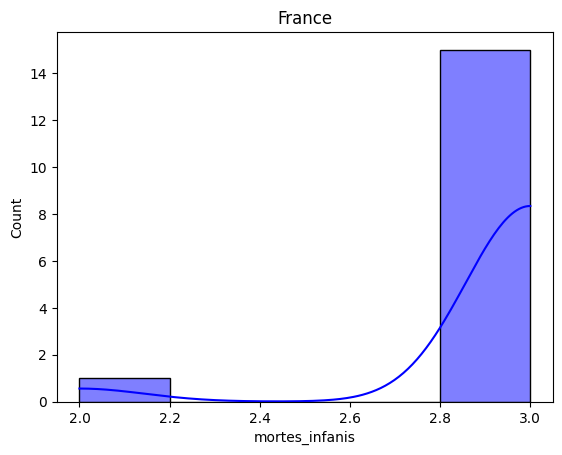

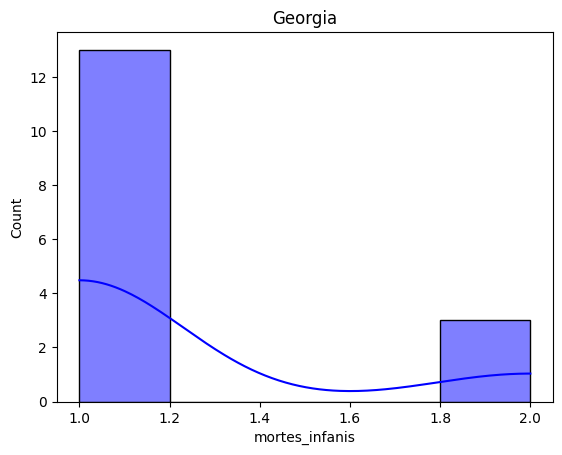

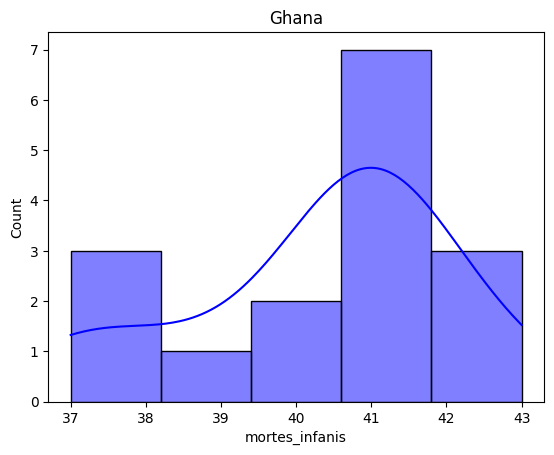

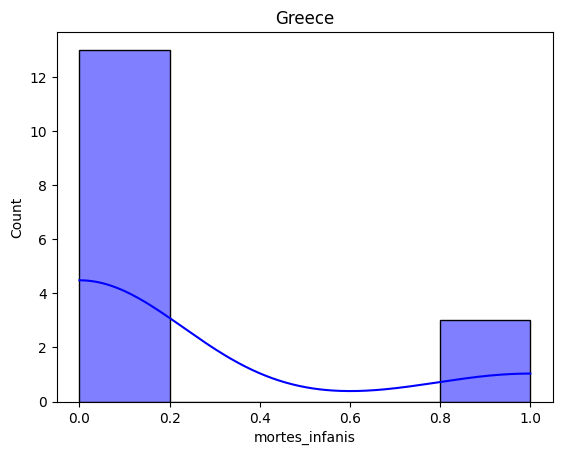

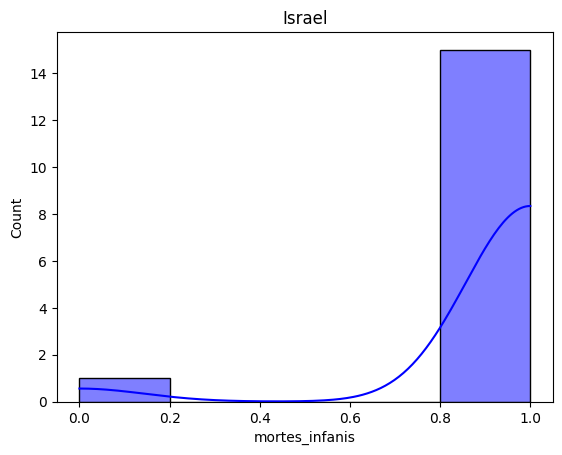

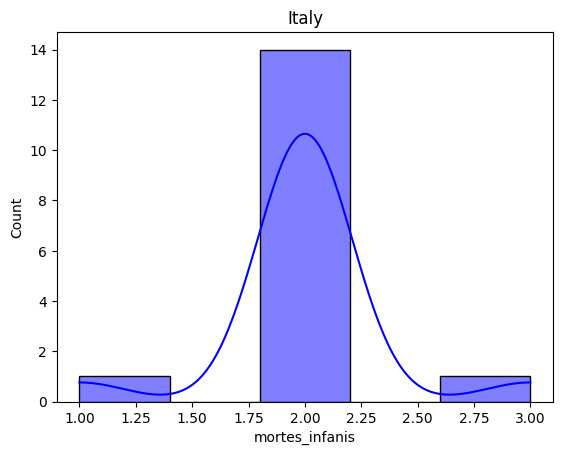

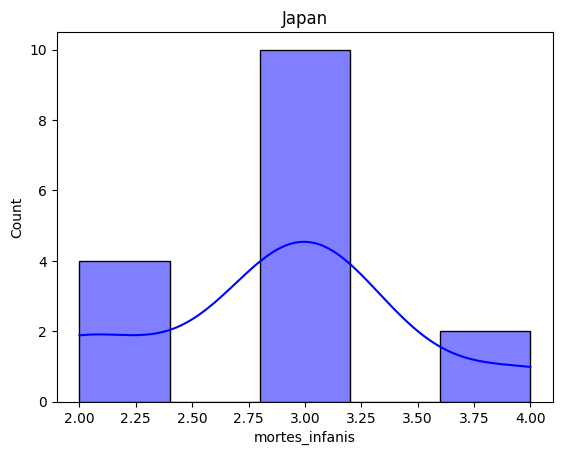

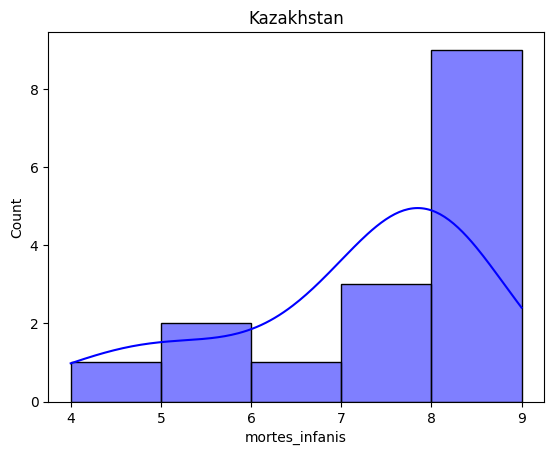

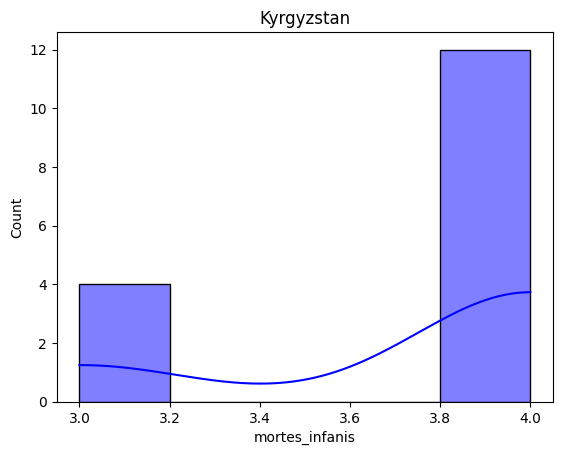

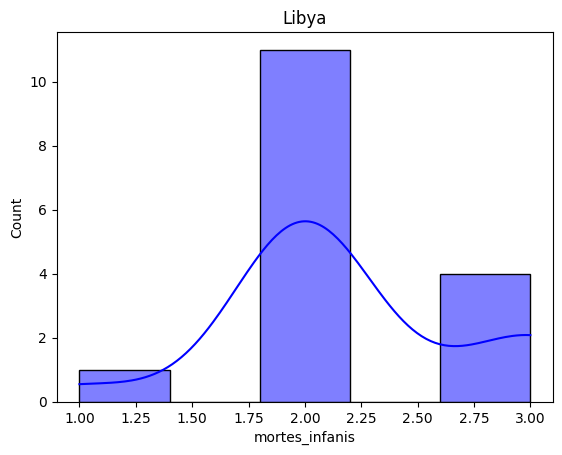

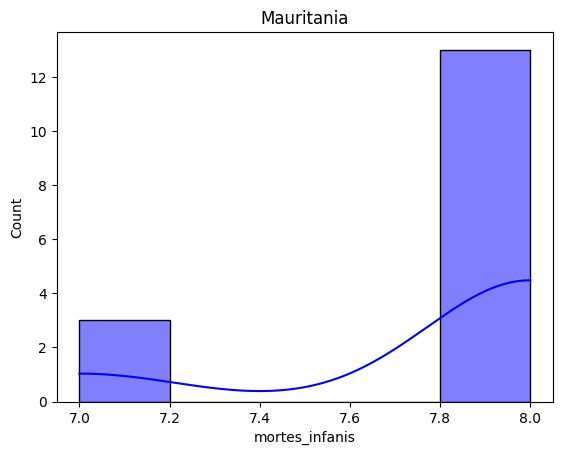

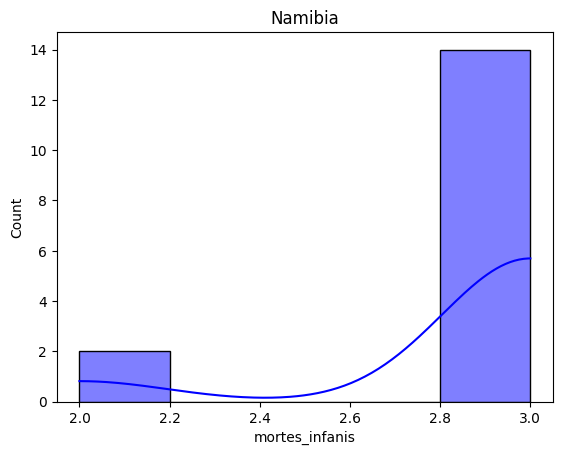

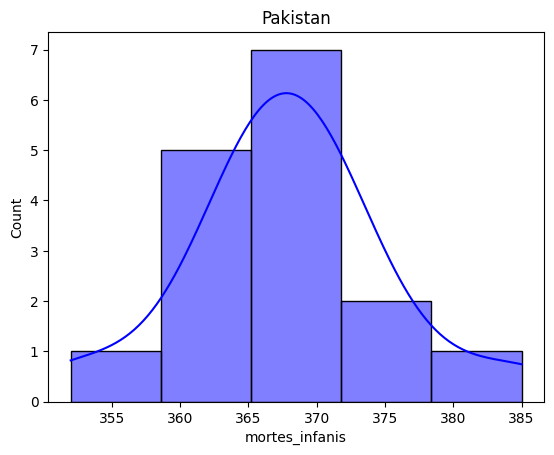

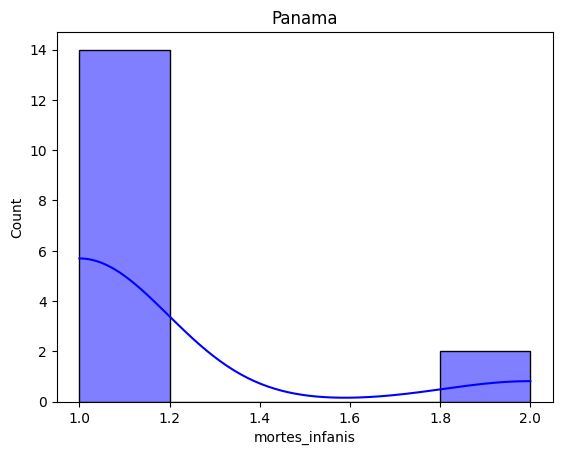

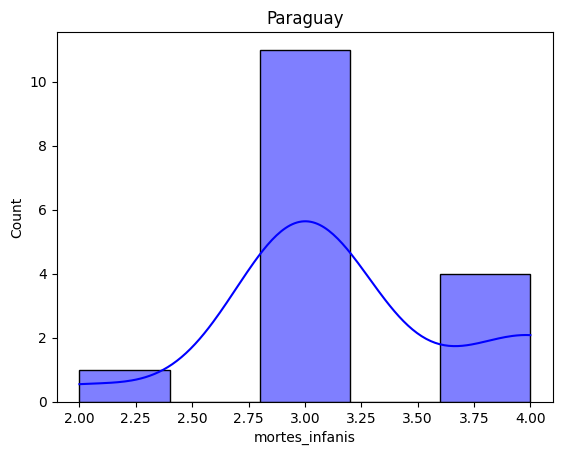

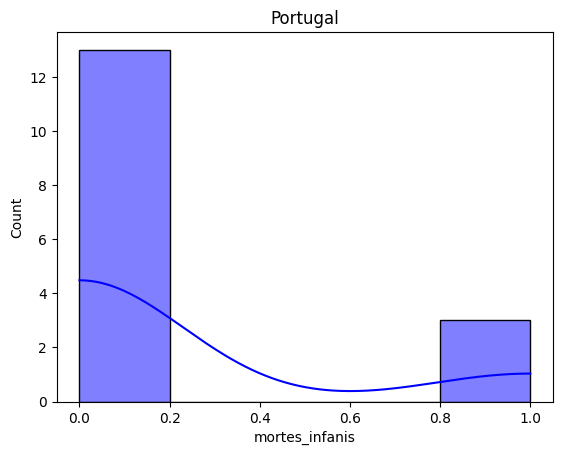

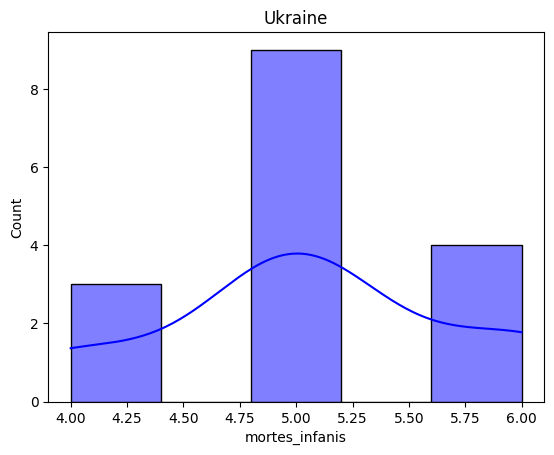

In [262]:
for pais in outliers_por_pais_mortes_infanis.pais.unique():
    sns.histplot(data=df_cleaned[df_cleaned['pais'] == pais], x='mortes_infanis', kde=True, bins=5, color='blue')
    plt.title(f'{pais}')
    plt.show()

___
## Trabalhando com a variável pct_despesa_saude_pib
___

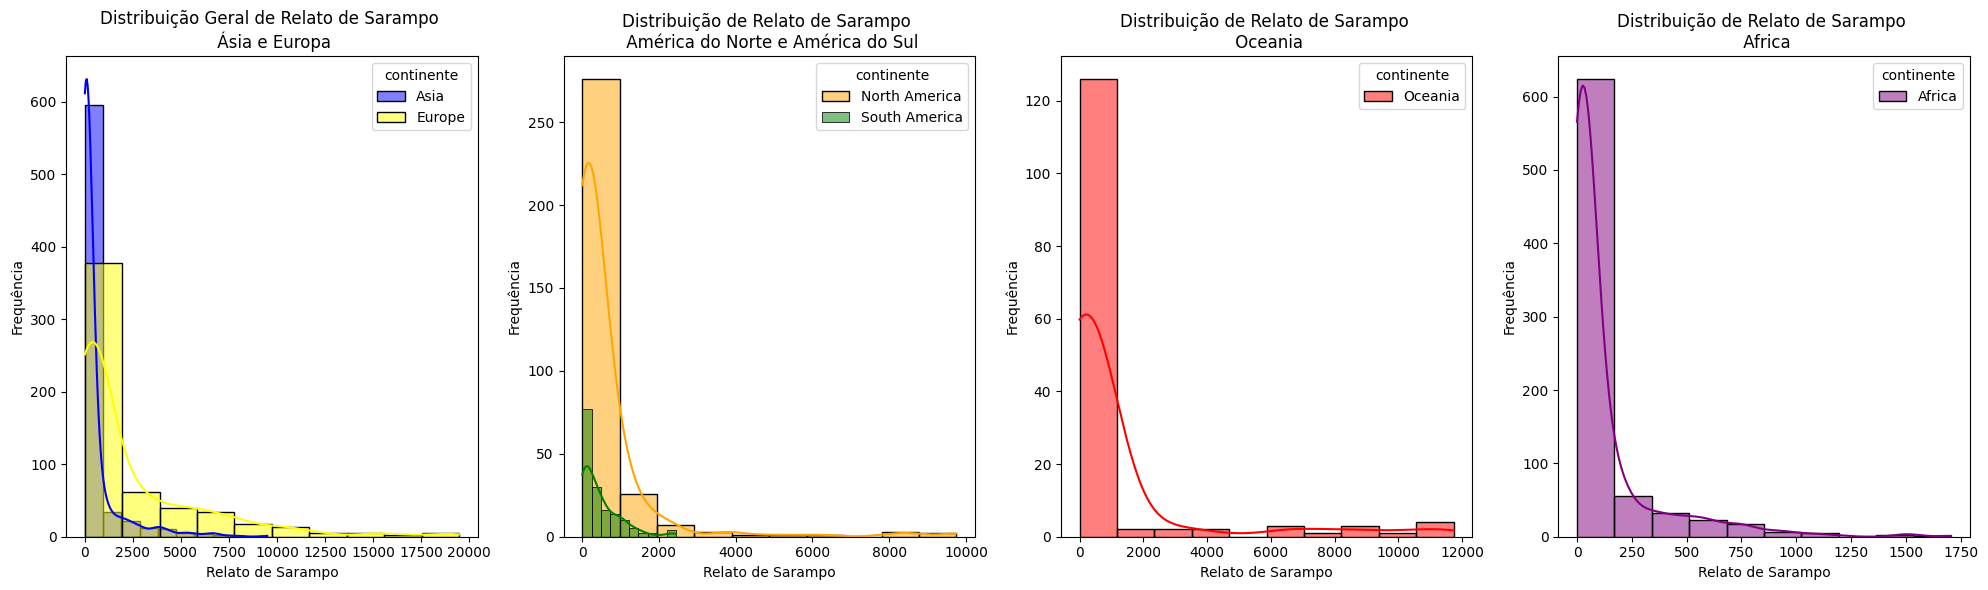

In [265]:
# Criar a figura e os subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Gráfico 1: Distribuição geral de Relato de Sarampo
sns.histplot(df_cleaned[df_cleaned['continente'] == 'Asia']['pct_despesa_saude_pib'], 
             kde=True, bins=10, color='blue', label='Asia', ax=axes[0])
sns.histplot(df_cleaned[df_cleaned['continente'] == 'Europe']['pct_despesa_saude_pib'], 
             kde=True, bins=10, color='yellow', label='Europe', ax=axes[0])
axes[0].set_title('Distribuição Geral de Relato de Sarampo \n Ásia e Europa')
axes[0].set_xlabel('Relato de Sarampo')
axes[0].set_ylabel('Frequência')
axes[0].legend(title='continente')

# Gráfico 2: Distribuição de Relato de Sarampo por continente (Asia vs Europe)
sns.histplot(df_cleaned[df_cleaned['continente'] == 'North America']['pct_despesa_saude_pib'], 
             kde=True, bins=10, color='orange', label='North America', ax=axes[1])
sns.histplot(df_cleaned[df_cleaned['continente'] == 'South America']['pct_despesa_saude_pib'], 
             kde=True, bins=10, color='green', label='South America', ax=axes[1])

# Configurações do segundo gráfico
axes[1].set_title('Distribuição de Relato de Sarampo \n América do Norte e América do Sul')
axes[1].set_xlabel('Relato de Sarampo')
axes[1].set_ylabel('Frequência')
axes[1].legend(title='continente')

sns.histplot(df_cleaned[df_cleaned['continente'] == 'Oceania']['pct_despesa_saude_pib'], 
             kde=True, bins=10, color='red', label='Oceania', ax=axes[2])

# Configurações do segundo gráfico
axes[2].set_title('Distribuição de Relato de Sarampo \n Oceania')
axes[2].set_xlabel('Relato de Sarampo')
axes[2].set_ylabel('Frequência')
axes[2].legend(title='continente')

sns.histplot(df_cleaned[df_cleaned['continente'] == 'Africa']['pct_despesa_saude_pib'], 
             kde=True, bins=10, color='purple', label='Africa', ax=axes[3])

# Configurações do segundo gráfico
axes[3].set_title('Distribuição de Relato de Sarampo \n Africa')
axes[3].set_xlabel('Relato de Sarampo')
axes[3].set_ylabel('Frequência')
axes[3].legend(title='continente')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

      continente  pct_despesa_saude_pib
0         Africa           9.220369e+04
1           Asia           3.476190e+05
2         Europe           1.319764e+06
3  North America           1.812543e+05
4        Oceania           1.523006e+05
5  South America           7.248462e+04


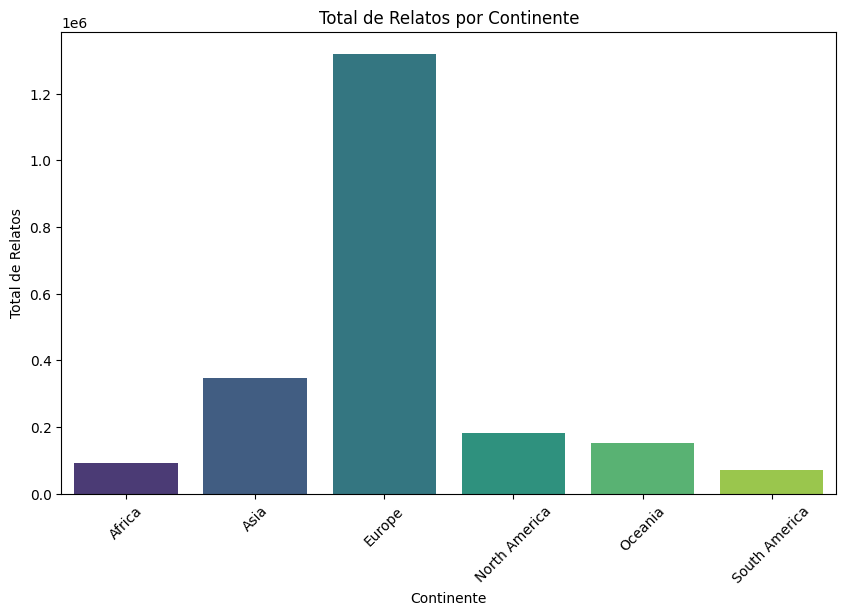

In [266]:
# Somando relatos por continente
continente_relatos = df_cleaned.groupby('continente')['pct_despesa_saude_pib'].sum().reset_index()

# Exibindo o DataFrame de continentes
print(continente_relatos)

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=continente_relatos, x='continente', y='pct_despesa_saude_pib', palette='viridis')
plt.title('Total de Relatos por Continente')
plt.xlabel('Continente')
plt.ylabel('Total de Relatos')
plt.xticks(rotation=45)
plt.show()

In [268]:
# Aplicar a função em cada grupo de país
result_pct_despesa_saude_pib = df_cleaned.groupby('pais').apply(check_high_and_zero, 'pct_despesa_saude_pib') # composicao_recursos_renda, pct_despesa_saude_pib

print(result_pct_despesa_saude_pib[result_pct_despesa_saude_pib == True].index)

Index(['Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Barbados',
       ...
       'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan',
       'Ukraine', 'United Arab Emirates', 'Uruguay', 'Vanuatu', 'Zambia'],
      dtype='object', name='pais', length=111)


In [282]:
df_cleaned4[df_cleaned4['pct_despesa_saude_pib'] == 0].ano.value_counts()

ano
2015    169
2014     19
2013     19
2012     19
2000     19
2002     18
2001     18
2003     18
2008     17
2009     17
2010     17
2011     17
2004     17
2005     16
2007     16
2006     16
Name: count, dtype: int64

In [292]:
df_cleaned4[df_cleaned4['pais'] == 'Zimbabwe']

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
2720,Zimbabwe,2015,Developing,67.0,336.0,22,4.482,0.000000,227.0,31.8,32,88.0,4.482,87.0,6.2,5.6,5.5,0.507,10.3,Africa
2721,Zimbabwe,2014,Developing,59.2,371.0,23,6.500,10.822595,227.0,31.3,34,92.0,6.440,91.0,6.3,5.9,5.7,0.498,10.3,Africa
2722,Zimbabwe,2013,Developing,58.0,399.0,25,6.390,10.666707,227.0,3.8,36,95.0,6.880,95.0,6.8,6.2,6.0,0.488,10.4,Africa
2723,Zimbabwe,2012,Developing,56.6,429.0,26,6.090,92.602336,227.0,3.3,39,95.0,6.690,95.0,8.8,6.5,6.4,0.464,9.8,Africa
2724,Zimbabwe,2011,Developing,54.9,464.0,28,6.000,63.750530,227.0,29.9,42,93.0,6.310,93.0,13.3,6.8,6.7,0.452,10.1,Africa
2725,Zimbabwe,2010,Developing,52.4,527.0,29,5.210,53.308581,234.5,29.4,44,89.0,5.370,89.0,15.7,7.1,7.0,0.436,10.0,Africa
2726,Zimbabwe,2009,Developing,50.0,587.0,30,4.640,1.040021,853.0,29.0,45,69.0,6.260,73.0,18.1,7.5,7.4,0.419,9.9,Africa
2727,Zimbabwe,2008,Developing,48.2,632.0,30,3.560,20.843429,227.0,28.6,46,75.0,4.960,75.0,20.5,7.8,7.8,0.421,9.7,Africa
2728,Zimbabwe,2007,Developing,46.6,67.0,29,3.880,29.814566,242.0,28.2,46,73.0,4.470,73.0,23.7,8.2,8.2,0.414,9.6,Africa
2729,Zimbabwe,2006,Developing,45.4,7.0,28,4.570,34.262169,212.0,27.9,45,71.0,5.120,7.0,26.8,8.6,8.6,0.408,9.5,Africa


In [277]:
df_cleaned4[(df_cleaned4['pct_despesa_saude_pib'] == 0) & (df_cleaned4['ano'] == 2000)]

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
175,Bahamas,2000,Developing,72.6,167.5,0,12.15,0.0,0.0,54.4,0,91.0,5.210000,99.0,0.1,2.7,2.6,0.000,12.0,North America
319,Bolivia (Plurinational State of),2000,Developing,62.6,243.0,15,2.32,0.0,0.0,42.6,20,74.0,5.670000,75.0,0.1,1.5,1.4,0.600,13.3,None
607,Congo,2000,Developing,52.9,416.0,9,2.26,0.0,1678.0,19.3,14,31.0,2.130000,33.0,7.8,9.5,9.2,0.487,9.8,Africa
751,Egypt,2000,Developing,68.8,171.0,65,0.14,0.0,2633.0,5.7,82,98.0,5.550000,98.0,0.1,3.6,3.5,0.606,11.0,Africa
911,Gambia,2000,Developing,55.9,285.0,3,2.18,0.0,0.0,18.0,6,84.0,3.610000,8.0,2.0,1.2,1.2,0.377,6.5,Africa
1167,Iran (Islamic Republic of),2000,Developing,73.0,15.0,35,0.01,0.0,241.0,44.9,43,99.0,4.470000,99.0,0.1,7.8,7.9,0.660,11.6,None
1183,Iraq,2000,Developing,70.0,144.0,30,0.20,0.0,726.0,49.5,37,83.0,0.134667,8.0,0.1,5.6,5.4,0.603,8.6,Asia
1359,Kyrgyzstan,2000,Developing,66.6,225.0,4,2.13,0.0,16.0,35.6,5,99.0,4.680000,99.0,0.1,3.6,3.6,0.586,11.4,Asia
1375,Lao People's Democratic Republic,2000,Developing,58.1,278.0,14,5.16,0.0,332.0,12.3,20,57.0,3.410000,51.0,0.1,1.5,1.5,0.459,8.0,Asia
1647,Micronesia (Federated States of),2000,Developing,67.0,185.0,0,2.23,0.0,0.0,61.5,0,85.0,7.880000,85.0,0.1,0.3,0.3,0.000,0.0,None


In [283]:
df_cleaned4[(df_cleaned4['pct_despesa_saude_pib'] == 0) & (df_cleaned4['ano'] == 2014)]

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
161,Bahamas,2014,Developing,75.4,167.5,0,9.45,0.0,0.0,63.8,0,96.0,7.74,96.0,0.1,2.5,2.5,0.789,12.6,North America
305,Bolivia (Plurinational State of),2014,Developing,74.0,189.0,8,3.62,0.0,0.0,51.9,10,99.0,6.33,98.0,0.1,1.2,1.1,0.666,13.8,None
593,Congo,2014,Developing,64.2,275.0,7,0.01,0.0,71.0,26.8,10,9.0,5.15,9.0,3.0,7.6,7.3,0.581,11.1,Africa
737,Egypt,2014,Developing,78.0,161.0,53,0.21,0.0,1314.0,6.2,62,94.0,5.64,94.0,0.1,2.8,2.8,0.686,13.1,Africa
785,Eritrea,2014,Developing,64.4,261.0,5,0.01,0.0,127.0,18.0,8,94.0,3.34,94.0,0.4,8.5,8.3,0.416,5.0,Africa
897,Gambia,2014,Developing,68.0,266.0,3,0.01,0.0,1.0,26.7,5,97.0,7.34,96.0,1.7,7.5,7.3,0.449,8.9,Africa
1153,Iran (Islamic Republic of),2014,Developing,75.4,83.0,19,0.01,0.0,99.0,58.5,22,99.0,6.89,99.0,0.1,8.3,8.4,0.770,14.9,None
1345,Kyrgyzstan,2014,Developing,78.0,216.0,3,0.01,0.0,16.0,43.9,4,95.0,6.48,96.0,0.1,3.3,3.4,0.656,12.8,Asia
1361,Lao People's Democratic Republic,2014,Developing,65.3,199.0,8,0.01,0.0,339.0,2.9,11,88.0,1.87,88.0,0.2,8.9,9.0,0.573,10.6,Asia
1441,Libya,2014,Developing,72.4,143.0,2,0.01,0.0,372.0,63.8,2,94.0,4.97,94.0,0.1,5.7,5.5,0.730,13.4,Africa


In [296]:
import pandas as pd

# Função para substituir os valores zerados pela média do grupo
def substituir_zeros_pela_media(grupo):
    media = grupo['pct_despesa_saude_pib'].mean()  # Calcula a média do grupo
    grupo['pct_despesa_saude_pib'] = grupo['pct_despesa_saude_pib'].replace(0, media)  # Substitui 0 pela média
    return grupo

# Agrupar por país e aplicar a função
df_cleaned5 = df_cleaned4.groupby('pais').apply(substituir_zeros_pela_media).reset_index(drop=True)

df_cleaned5[df_cleaned5['pais'] == 'Zimbabwe']


,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,continente
2720,Zimbabwe,2015,Developing,67.0,336.0,22,4.482,20.364271,227.0,31.8,32,88.0,4.482,87.0,6.2,5.6,5.5,0.507,10.3,Africa
2721,Zimbabwe,2014,Developing,59.2,371.0,23,6.500,10.822595,227.0,31.3,34,92.0,6.440,91.0,6.3,5.9,5.7,0.498,10.3,Africa
2722,Zimbabwe,2013,Developing,58.0,399.0,25,6.390,10.666707,227.0,3.8,36,95.0,6.880,95.0,6.8,6.2,6.0,0.488,10.4,Africa
2723,Zimbabwe,2012,Developing,56.6,429.0,26,6.090,92.602336,227.0,3.3,39,95.0,6.690,95.0,8.8,6.5,6.4,0.464,9.8,Africa
2724,Zimbabwe,2011,Developing,54.9,464.0,28,6.000,63.750530,227.0,29.9,42,93.0,6.310,93.0,13.3,6.8,6.7,0.452,10.1,Africa
2725,Zimbabwe,2010,Developing,52.4,527.0,29,5.210,53.308581,234.5,29.4,44,89.0,5.370,89.0,15.7,7.1,7.0,0.436,10.0,Africa
2726,Zimbabwe,2009,Developing,50.0,587.0,30,4.640,1.040021,853.0,29.0,45,69.0,6.260,73.0,18.1,7.5,7.4,0.419,9.9,Africa
2727,Zimbabwe,2008,Developing,48.2,632.0,30,3.560,20.843429,227.0,28.6,46,75.0,4.960,75.0,20.5,7.8,7.8,0.421,9.7,Africa
2728,Zimbabwe,2007,Developing,46.6,67.0,29,3.880,29.814566,242.0,28.2,46,73.0,4.470,73.0,23.7,8.2,8.2,0.414,9.6,Africa
2729,Zimbabwe,2006,Developing,45.4,7.0,28,4.570,34.262169,212.0,27.9,45,71.0,5.120,7.0,26.8,8.6,8.6,0.408,9.5,Africa


In [297]:
df_cleaned5[df_cleaned5['pct_despesa_saude_pib'] == 0].ano.value_counts()

ano
2015    16
2014    16
2013    16
2012    16
2011    16
2010    16
2009    16
2008    16
2007    16
2006    16
2005    16
2004    16
2003    16
2002    16
2001    16
2000    16
Name: count, dtype: int64

In [ ]:
df_cleaned5[df_cleaned5['pct_despesa_saude_pib'] == 0]